## **BUSINESS UNDERSTANDING**

The dataset contains anonymized sales data. The aim of this dataset is to provide insights and recommendations that can be used to improve product performance, customer retention and operation efficiency. The dataset also contains information about products, businesses, quantities and prices. 

### Objectives 

- Identify trends and patterns in sales data.
- Assess customer behavior and preferences.
- Recommend products or marketing campaigns that could improve sales and customer retention.
- Monitor operational efficiency and optimize product inventory.
- Develop a predictive model to forecast future sales.

### Analytical questions 

- Calculate the total value and quantity grouped by category and business.
- Analyze sales trends value and quantity by month-year.
- Identify the top 5 products most frequently purchased based on quantity.
- Identify the top 5 most valuable products based on value.

## **DATA UNDERSTANDING**

The dataset contains the following columns:

- `date` (The date at which sales have been made)
- `anonymized_category ` (unique identifier for each category)
- `anonymized_product` (unique identifier for each product)
- `anonymized_business` (Unique identifier for each business)
- `anonymized_location` ( Unique identifier for each business location)
- `quantity` (Number of products sold)
- `unit_price` (Price per product)

### TASKS 

- Data cleaning and preprocessing: Check for missing values, duplicate entries, and inconsistent data formats.
- Exploratory data analysis: Analyze trends in sales data, identify popular products, businesses, and locations.
- Data visualization: Create visualizations to better understand the data, such as line charts, bar charts, and heatmaps.
- Customer segmentation: Use clustering algorithms to group customers based on their purchase history and preferences.
- Product recommendation: Develop a recommendation system that suggests products to customers based on their past purchases and preferences.

In [83]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import warnings 

warnings.filterwarnings('ignore')

## Statistical Libraries
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, zivot_andrews

## Machine Learning Libraries
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from pmdarima import auto_arima

**LOAD DATA**

In [2]:
df = pd.read_csv("dataset\Case study data.csv")

df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [3]:
## Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [4]:
## data unique values in a list

df.nunique()

DATE                   96703
ANONYMIZED CATEGORY       46
ANONYMIZED PRODUCT       820
ANONYMIZED BUSINESS     4800
ANONYMIZED LOCATION       53
QUANTITY                  79
UNIT PRICE              1050
dtype: int64

In [5]:
## Check for shape

df.shape

(333405, 7)

In [6]:
## Check missing values

df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [7]:
## Check for duplicates

df.duplicated().sum()

3524

In [8]:
## Check for statistical summary

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,333405,96703,"May 13, 2024, 8:25 PM",98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANONYMIZED CATEGORY,333405,46,Category-120,61666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANONYMIZED PRODUCT,333405,820,Product-e805,25092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANONYMIZED BUSINESS,333405,4800,Business-978e,2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANONYMIZED LOCATION,333405,53,Location-689f,44397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUANTITY,333405.0,NaN,NaN,NaN,2.321186,3.790614,0.0,1.0,1.0,2.0,359.0
UNIT PRICE,333397,1050,"1,520",5921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## Create a unique list of values for each column
categories = df['ANONYMIZED CATEGORY'].unique()
business= df["ANONYMIZED BUSINESS"].unique()
products = df['ANONYMIZED PRODUCT'].unique()
locations = df['ANONYMIZED LOCATION'].unique()

In [10]:
## Check if all dates are in the dataset

# Convert the DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Generate a sequence of dates for the desired range and frequency
start_date = df["DATE"].min()
end_date = df["DATE"].max()
print(f"The start date of the dataset is: {start_date}")
print(f"The end date of the dataset is: {end_date}")
print("--------------------------------------")

# Generate a sequence of dates for the desired range and frequency
new_dates = pd.date_range(start=df["DATE"].min(), end=df["DATE"].max(), freq='D')

# Check if all dates in the new_dates sequence are present in the df timeseries
missing_dates = new_dates[~new_dates.isin(df["DATE"])]

# Print the missing dates
print(missing_dates)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10884\2809534974.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DATE"] = pd.to_datetime(df["DATE"])


The start date of the dataset is: 2024-01-01 05:54:00
The end date of the dataset is: 2024-12-31 18:24:00
--------------------------------------
DatetimeIndex(['2024-01-02 05:54:00', '2024-01-03 05:54:00',
               '2024-01-04 05:54:00', '2024-01-05 05:54:00',
               '2024-01-06 05:54:00', '2024-01-07 05:54:00',
               '2024-01-08 05:54:00', '2024-01-09 05:54:00',
               '2024-01-10 05:54:00', '2024-01-11 05:54:00',
               ...
               '2024-12-22 05:54:00', '2024-12-23 05:54:00',
               '2024-12-24 05:54:00', '2024-12-25 05:54:00',
               '2024-12-26 05:54:00', '2024-12-27 05:54:00',
               '2024-12-28 05:54:00', '2024-12-29 05:54:00',
               '2024-12-30 05:54:00', '2024-12-31 05:54:00'],
              dtype='datetime64[ns]', length=364, freq=None)


**OBSERVATION**

- The dataset contains 333407 rows and 7 columns.
- There are missing values in the dataset.
- There are duplicate entries in the dataset.
- There are missing dates on the dataset.
- The dates are not in chronological order.
- There are inconsistent data types in the dataset which are unit price and dates. 
- In this data, the most significant date is May 13 2024, followed by category is category 120, the most frequent product is Product-e805, the most frequent business is Business-978e, and the most frequent location is location- 689f.
- The quantity mean and standard deviation of the dataset are 2.321186	, 3.790614 respectively. 

**ACTION**

- Convert the titles into lowercase and hyphenated.
- Sort the data by date.
- Convert the DATE column to datetime format.
- Remove duplicate entries.
- Handle missing dates and missing values: Fill with interpolation method.
- Convert unit price into numeric data type.
- Calculate the total value of each column.
- Feature engineer the dates into month-year column. 

## **DATA CLEANING**

In [11]:
## Convert the title columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"


In [12]:
# Remove commas from the unit_price column and convert to numeric
df['unit_price'] = df['unit_price'].str.replace(',', '').astype(float)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 333405 non-null  datetime64[ns]
 1   anonymized_category  333405 non-null  object        
 2   anonymized_product   333405 non-null  object        
 3   anonymized_business  333405 non-null  object        
 4   anonymized_location  333405 non-null  object        
 5   quantity             333405 non-null  int64         
 6   unit_price           333397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 17.8+ MB


In [13]:
df["unit_price"].describe()

count    333397.000000
mean       2322.039538
std        1585.256624
min           0.000000
25%        1420.000000
50%        1840.000000
75%        2755.000000
max       16136.000000
Name: unit_price, dtype: float64

In [14]:
## Sort the dates according to calendar
df = df.sort_values(by="date")

df.head()

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0
179544,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2,2180.0
101383,2024-01-01 10:45:00,Category-85,Product-6859,Business-4af0,Location-d1a8,2,885.0


In [15]:
## Fill in the unit_price column with interpolated values

df['unit_price']= df['unit_price'].interpolate(method='linear')

## Check for missing values
df.isnull().sum()

date                   0
anonymized_category    0
anonymized_product     0
anonymized_business    0
anonymized_location    0
quantity               0
unit_price             0
dtype: int64

In [16]:
# Display duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price
244229,2024-01-01 12:48:00,Category-91,Product-8ebc,Business-fef1,Location-3e32,1,1540.0
244230,2024-01-01 12:48:00,Category-111,Product-bdba,Business-fef1,Location-3e32,1,577.0
136824,2024-01-01 16:27:00,Category-76,Product-e805,Business-fba5,Location-1ba8,1,7580.0
136823,2024-01-01 16:27:00,Category-77,Product-d09c,Business-fba5,Location-1ba8,2,2980.0
136822,2024-01-01 16:27:00,Category-91,Product-1b48,Business-fba5,Location-1ba8,1,3680.0
...,...,...,...,...,...,...,...
46805,2024-12-27 20:22:00,Category-120,Product-1e80,Business-30b8,Location-3fc0,1,1780.0
46807,2024-12-27 20:22:00,Category-119,Product-e98d,Business-30b8,Location-3fc0,1,1680.0
300784,2024-12-27 20:22:00,Category-120,Product-7864,Business-30b8,Location-3fc0,1,1930.0
57900,2024-12-29 19:41:00,Category-120,Product-83fd,Business-3215,Location-689f,5,1660.0


In [17]:
## Remove duplicate entries

df.drop_duplicates(inplace=True)
df.shape

(329881, 7)

In [18]:
## Create a dataframe 
dates_missing = list(missing_dates)
miss_dates = pd.DataFrame(dates_missing, columns=["date"])

## Merge the missing date into the original dataframe
new_data = pd.concat([df, miss_dates], ignore_index=True)

## Sort the dates according to calendar
new_data = new_data.sort_values(by="date")

# Display the first few rows of the new dataframe
new_data.head()

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10.0,2185.0
1,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1.0,1190.0
2,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1.0,4365.0
3,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2.0,2180.0
4,2024-01-01 10:45:00,Category-85,Product-6859,Business-4af0,Location-d1a8,2.0,885.0


In [19]:
## Check for missing values
new_data.isnull().sum()

## Find the missing values
new_data=new_data.ffill(limit_area='inside')

## Check for missing values
new_data.isnull().sum()

date                   0
anonymized_category    0
anonymized_product     0
anonymized_business    0
anonymized_location    0
quantity               0
unit_price             0
dtype: int64

In [20]:
## Calculate total sales of the dataset

new_data["sales"] = new_data["quantity"] * new_data["unit_price"]
total_sales = new_data["sales"].sum()
print(f"The total sales of the dataset is: {total_sales}")

The total sales of the dataset is: 1773768498.0


In [21]:
## Feature engineer the dates into month-year column
new_data['month_year'] = new_data['date'].dt.strftime('%B-%Y').str.lower()
new_data.head()

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price,sales,month_year
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10.0,2185.0,21850.0,january-2024
1,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1.0,1190.0,1190.0,january-2024
2,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1.0,4365.0,4365.0,january-2024
3,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2.0,2180.0,4360.0,january-2024
4,2024-01-01 10:45:00,Category-85,Product-6859,Business-4af0,Location-d1a8,2.0,885.0,1770.0,january-2024


In [22]:
## Set the index of the new data
new_data.set_index('date', inplace=True)

In [23]:
### Create new columns to represent the dates
def create_features(df):
    df["month"]= df.index.month
    df["quater"]= df.index.quarter
    df["dayofmonth"]= df.index.day
    df["dayoftheweek"]=df.index.weekday
    df['Is_Weekend'] = df['dayoftheweek'].isin([5, 6])
    
    return df

In [24]:
## Extract features
new_data = create_features(new_data)

### **DATA VISUALIZATION**

**UNIVARIATE ANALYSIS**

In [25]:
## Check for the skewness of the data
skewed = new_data.drop(columns=["anonymized_category", "anonymized_product", "anonymized_business", "anonymized_location", "month_year"],axis=1).skew()
print (skewed)

quantity        18.452441
unit_price       1.396203
sales           35.593575
month           -0.282463
quater          -0.251487
dayofmonth       0.021118
dayoftheweek     0.288107
Is_Weekend       1.684115
dtype: float64


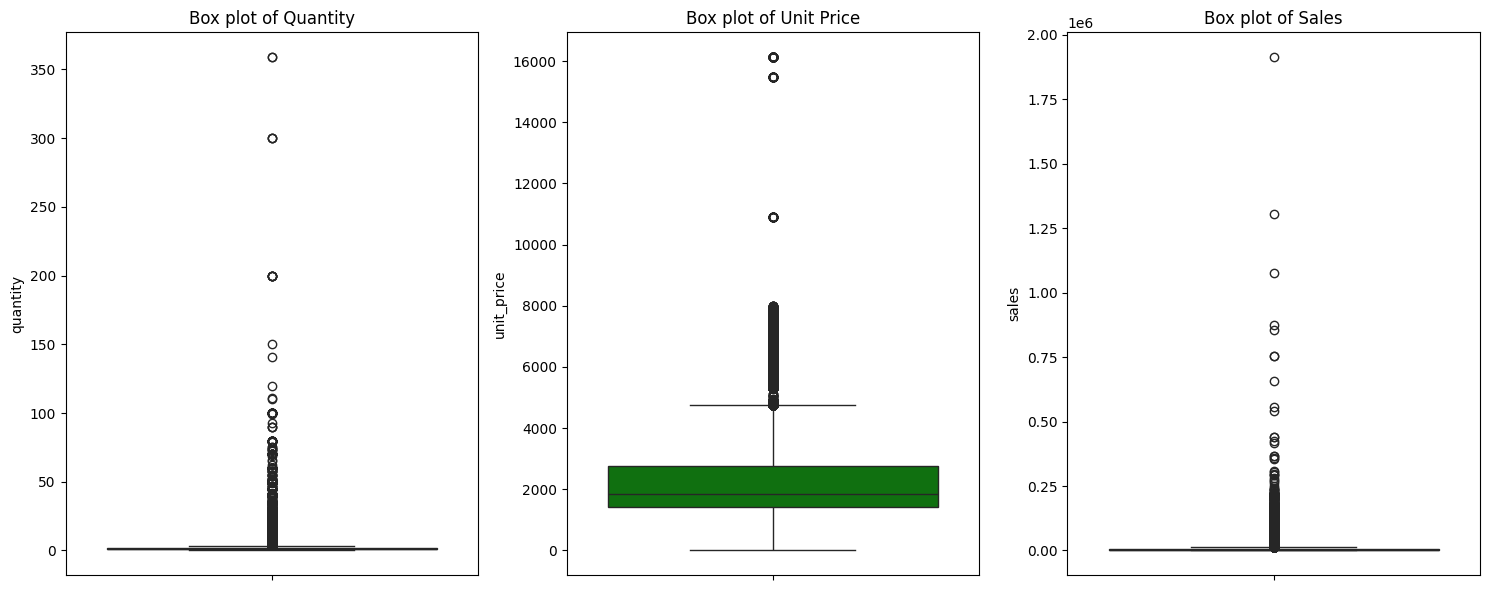

In [26]:
# Check for outliers in the data using box plots
plt.figure(figsize=(15, 6))

# Box plot for quantity
plt.subplot(1, 3, 1)
sns.boxplot(y=new_data['quantity'], color='green')
plt.title('Box plot of Quantity')

# Box plot for unit_price
plt.subplot(1, 3, 2)
sns.boxplot(y=new_data['unit_price'], color='green')
plt.title('Box plot of Unit Price')

# Box plot for sales
plt.subplot(1, 3, 3)
sns.boxplot(y=new_data['sales'], color='green')
plt.title('Box plot of Sales')

plt.tight_layout()
plt.show()

**BIVARIATE ANALYSIS**

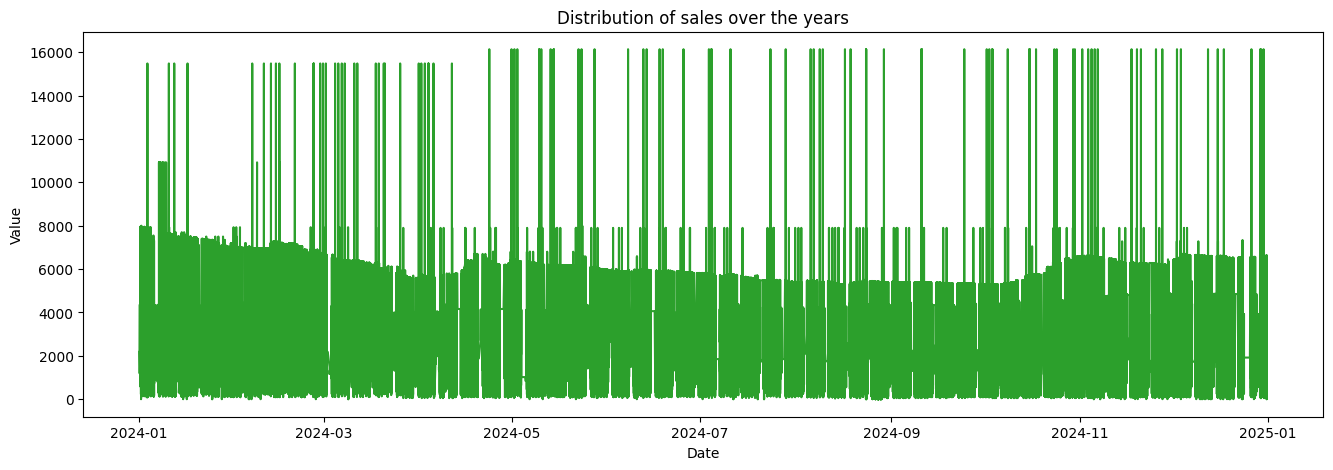

In [27]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(new_data, x=new_data.index, y=new_data["unit_price"], title='Distribution of sales over the years') 

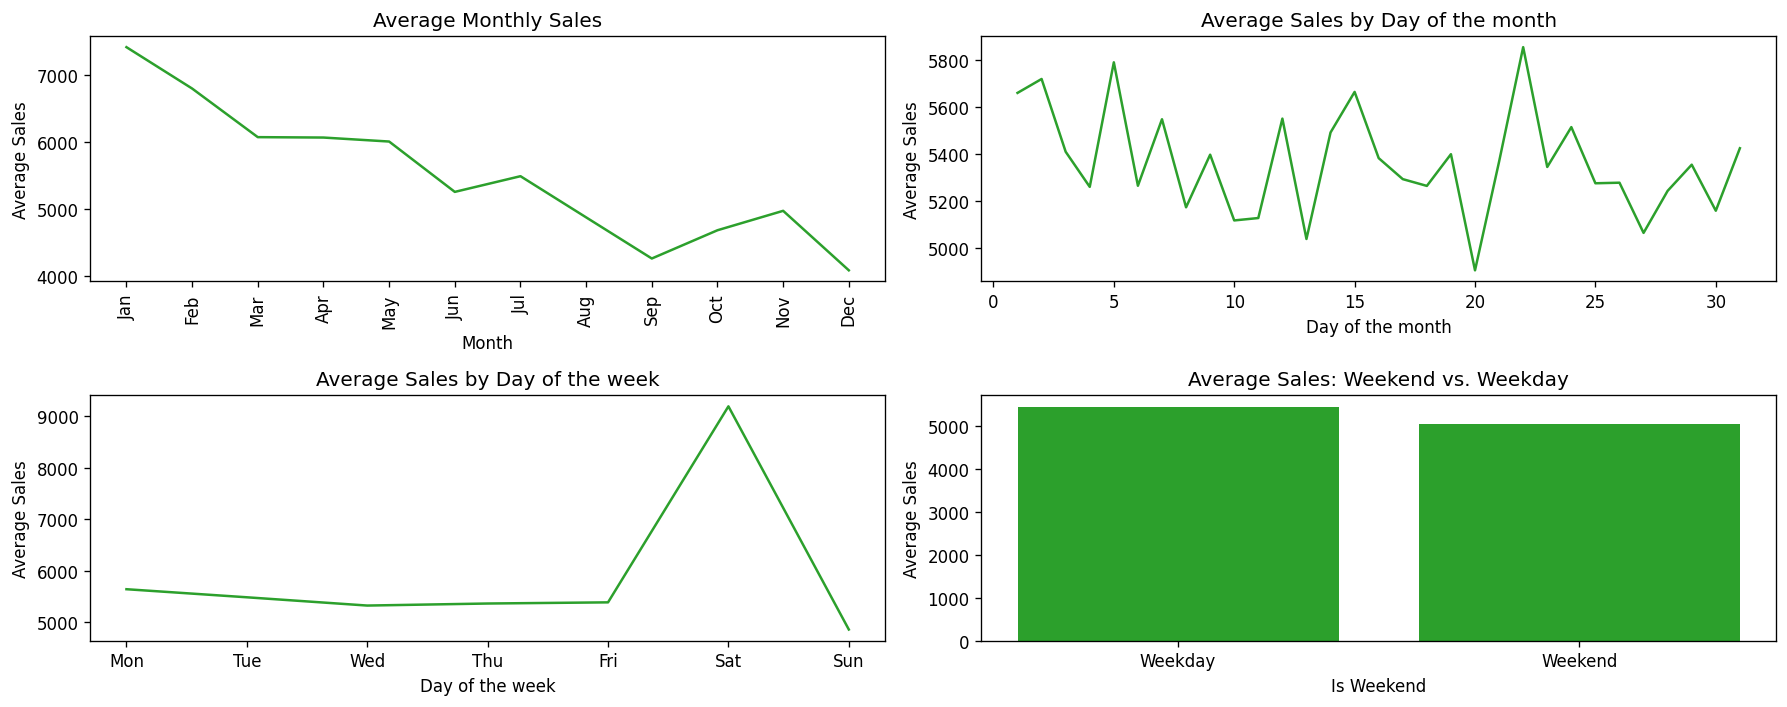

In [28]:
## Analysis of dates from the extractable features
plt.figure(figsize=(15,6))
           
           
# Seasonal Patterns (Monthly)
monthly_sales = new_data.groupby('month')['sales'].mean()
plt.subplot(2,2,1)
plt.plot(monthly_sales.index, monthly_sales.values, color='tab:green')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt. xticks(rotation = 90)

# Day of the month Analysis
day_of_month_sales = new_data.groupby('dayofmonth')['sales'].mean()
plt.subplot(2,2,2)
plt.plot(day_of_month_sales.index, day_of_month_sales.values, color='tab:green')
plt.title('Average Sales by Day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Average Sales')


# Day of the week Analysis
day_of_week_sales = new_data.groupby('dayoftheweek')['sales'].mean()
plt.subplot(2,2,3,)
plt.plot(day_of_week_sales.index, day_of_week_sales.values, color='tab:green')
plt.title('Average Sales by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Is Weekend Analysis
weekend_sales = new_data.groupby('Is_Weekend')['sales'].mean()
plt.subplot(2,2,4)
plt.bar(weekend_sales.index, weekend_sales.values,color='tab:green')
plt.title('Average Sales: Weekend vs. Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Weekday', 'Weekend'])


plt.tight_layout()
plt.show()

**MULTIVARIATE ANALYSIS**

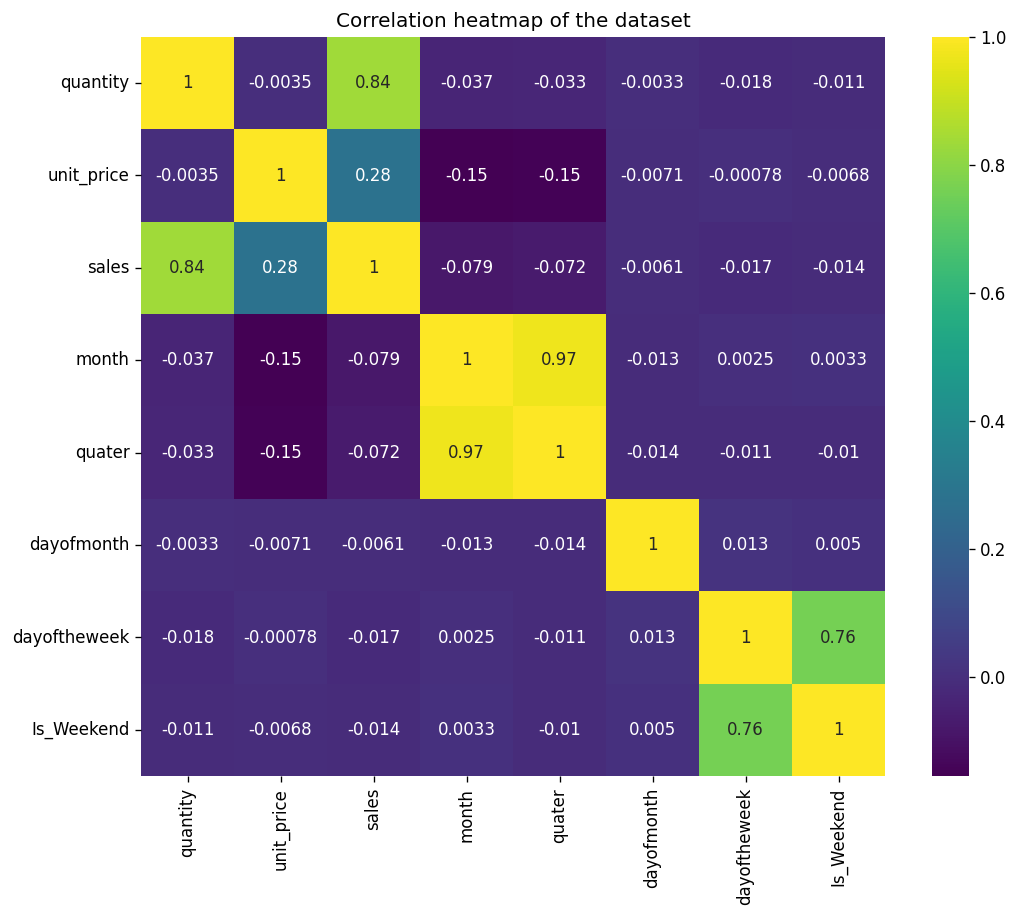

In [29]:
# The correlation of numeric values 
correlation_matrix = new_data.corr(numeric_only= True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation heatmap of the dataset")
plt.show()

### **REVIEWS**

- The dataset is highly skewed with quantity having 18.45 and sales having 35.59. 
- The correlation of numeric values shows that quantity and sales are highly correlated with a common range of 0.84. 
- The box plots show that there are outliers in the data. However, these outliers might be due to the presence of extreme values.
- The dataset spans from January 2024 to December 2024. However, the missing dates were added to the dataset. The sales and quantity data are available for 365 days.
- The distrubution of sales over the year shows that there is seasonality in the data rather than a trend in the data.
- In our extracted features based on months and day, we can extract that on average monthly sales January has the highest sales. In which the trend of sales take a steep descend upto November where it shows an slight increase in average sales. 
- Sales by days of the week indicate the highest sales on saturday only during the weekends. There are sales during the week however not significant, we can see that overall average of sales by weekdays and weekends, weekdays have more sales than weekends.
- In average sales by day of the month, there is an increased trend of sales in 5th day, 15 and 22.

**CONCLUSION**

This dataset provides valuable insights into the sales and product data for the given period. By analyzing the data, we can identify trends, seasonality, and potential areas for improvement. By understanding the sales by category, businesses, and products, we can make data-driven decisions to improve the overall performance and customer satisfaction. Additionally, we can use this dataset to forecast future sales and plan marketing strategies accordingly.

### **ANALYTICAL QUESTIONS**

**SALES OVERVIEW**

1. Sales and quantity by category 

   anonymized_category  Total_quantity  Total_sales
25         Category-75        151787.0  546248505.0
26         Category-76         71833.0  345630273.0
18        Category-120        169823.0  319380129.0
0         Category-100         77692.0  136604666.0
17        Category-119         68357.0  103491439.0


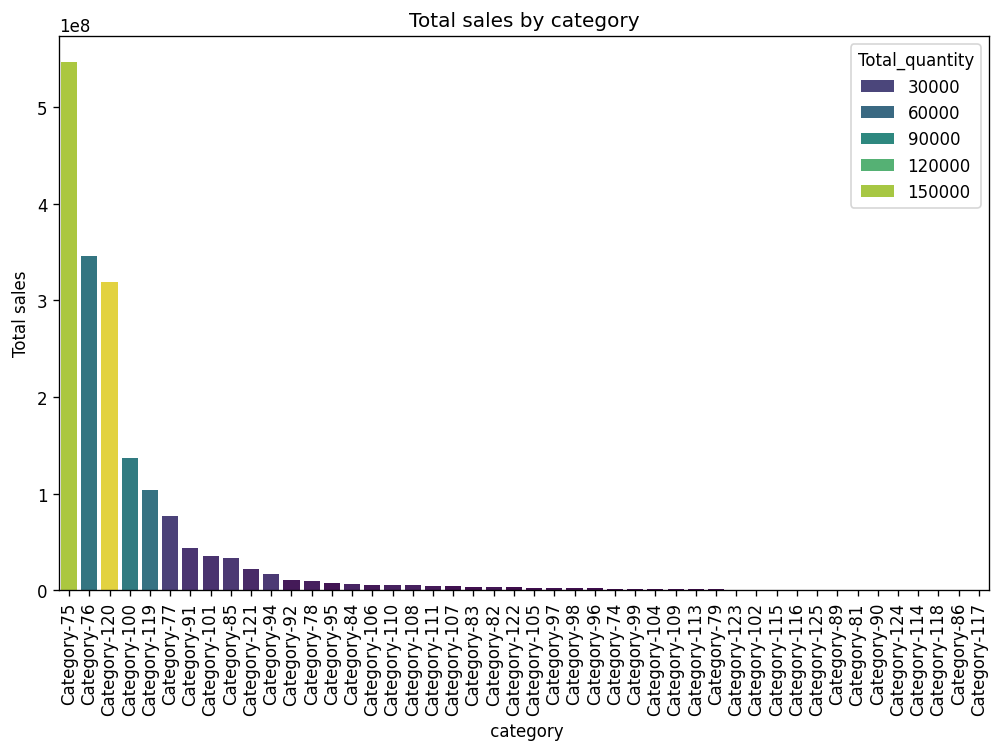

In [30]:
sales_by_category = new_data.groupby("anonymized_category")[["quantity", "sales"]].sum().rename(columns={"quantity":"Total_quantity", "sales":"Total_sales"}).reset_index()

sales_by_category= sales_by_category.sort_values(by="Total_sales", ascending=False)

print(sales_by_category.head())

# Plot the sales by category

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x="anonymized_category", y="Total_sales", hue="Total_quantity", palette='viridis')
plt.title("Total sales by category")
plt.xlabel(" category")
plt.ylabel("Total sales")
plt.xticks(rotation=90)
plt.show()

2. Sales and quantity by business

In [31]:
## Calculate total quantity and value grouped by business
pivot_table = new_data.pivot_table(values=['quantity', 'sales'], index='anonymized_business', aggfunc={'quantity': 'sum', 'sales': 'sum'})
pivot_table.rename(columns={'quantity': 'Total_quantity', 'sales': 'Total_sales'}, inplace=True)
pivot_table.reset_index(inplace=True)
pivot_table = pivot_table.sort_values(by='Total_sales', ascending=False)
pivot_table.head()

,anonymized_business,Total_quantity,Total_sales
2906,Business-978e,14427.0,28934628.0
4781,Business-fe7d,6758.0,27024496.0
1873,Business-6068,8214.0,16464195.0
144,Business-07de,6065.0,16258068.0
2353,Business-7a03,6318.0,13968451.0


**REVIEW**

- The businesses with the highest sales are Business-978e, Business-fe7d, Business-6068, Business-07de, and Business-7a03.

- Business-978e has the highest sales and the highest quantity sold at 28m  and 14427 respectively.

- Most purchased categories are category 75, 76, 120, 100, 119.

- Category 75 is the most in demand category in both value and quantity ranging at 546m and 151787 respectively.

2. TRENDS OVER TIME

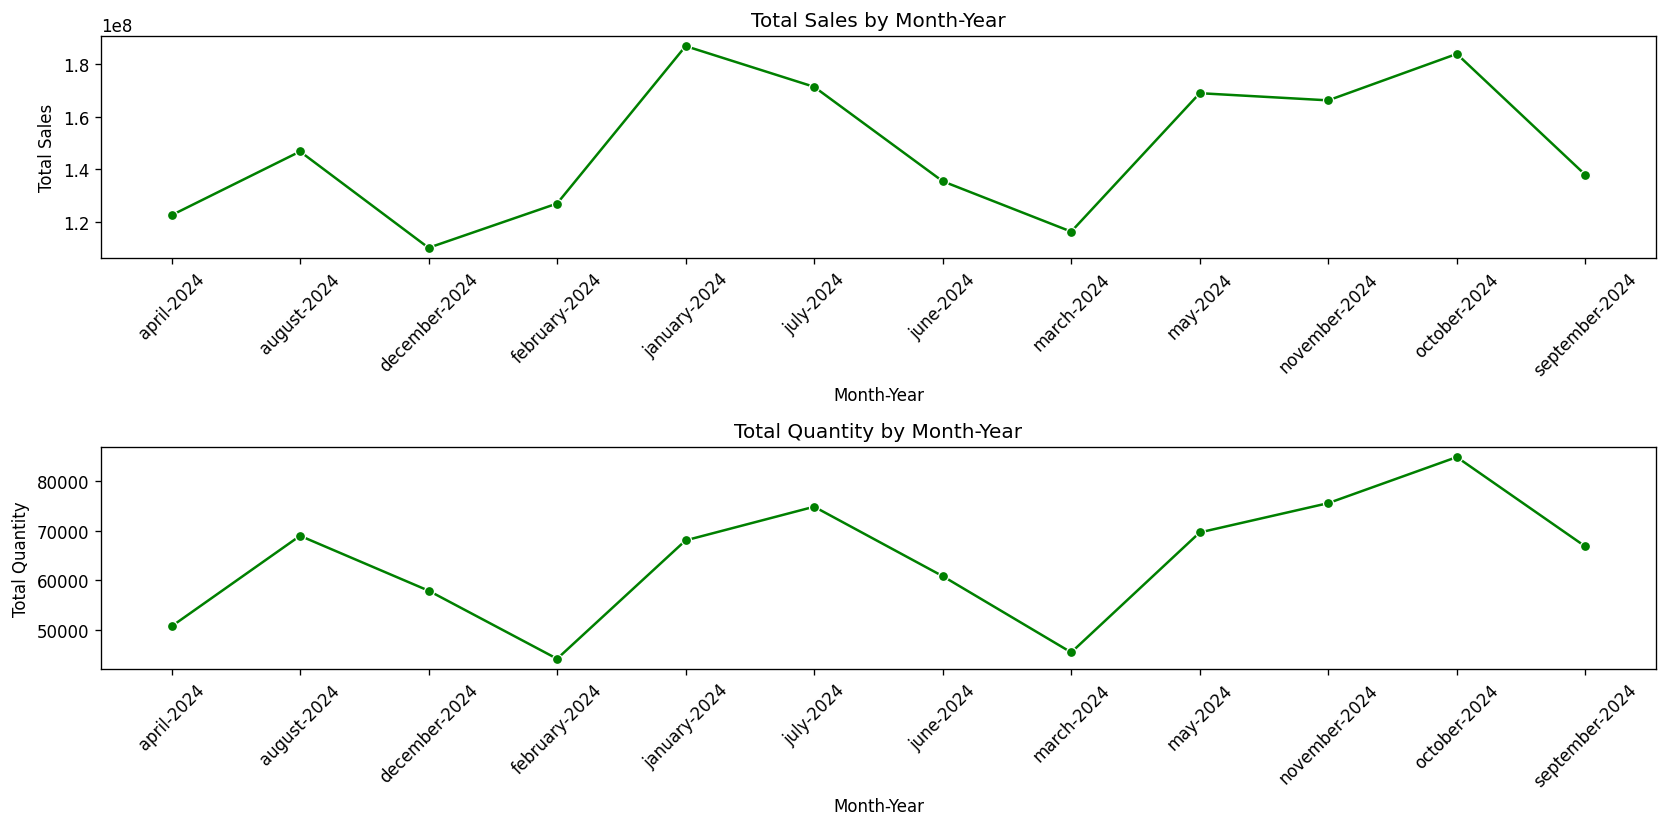

In [32]:
# Group by month_year and calculate total sales and total quantity
sales_trends = new_data.groupby('month_year').agg({'sales': 'sum', 'quantity': 'sum'}).reset_index()

# Plot the sales trends
plt.figure(figsize=(14, 7))

# Plot total sales
plt.subplot(2, 1, 1)
sns.lineplot(data=sales_trends, x='month_year', y='sales', marker='o', color="green")
plt.title('Total Sales by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Plot total quantity
plt.subplot(2, 1, 2)
sns.lineplot(data=sales_trends, x='month_year', y='quantity', marker='o', color="green")
plt.title('Total Quantity by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**DECOMPOSITION**

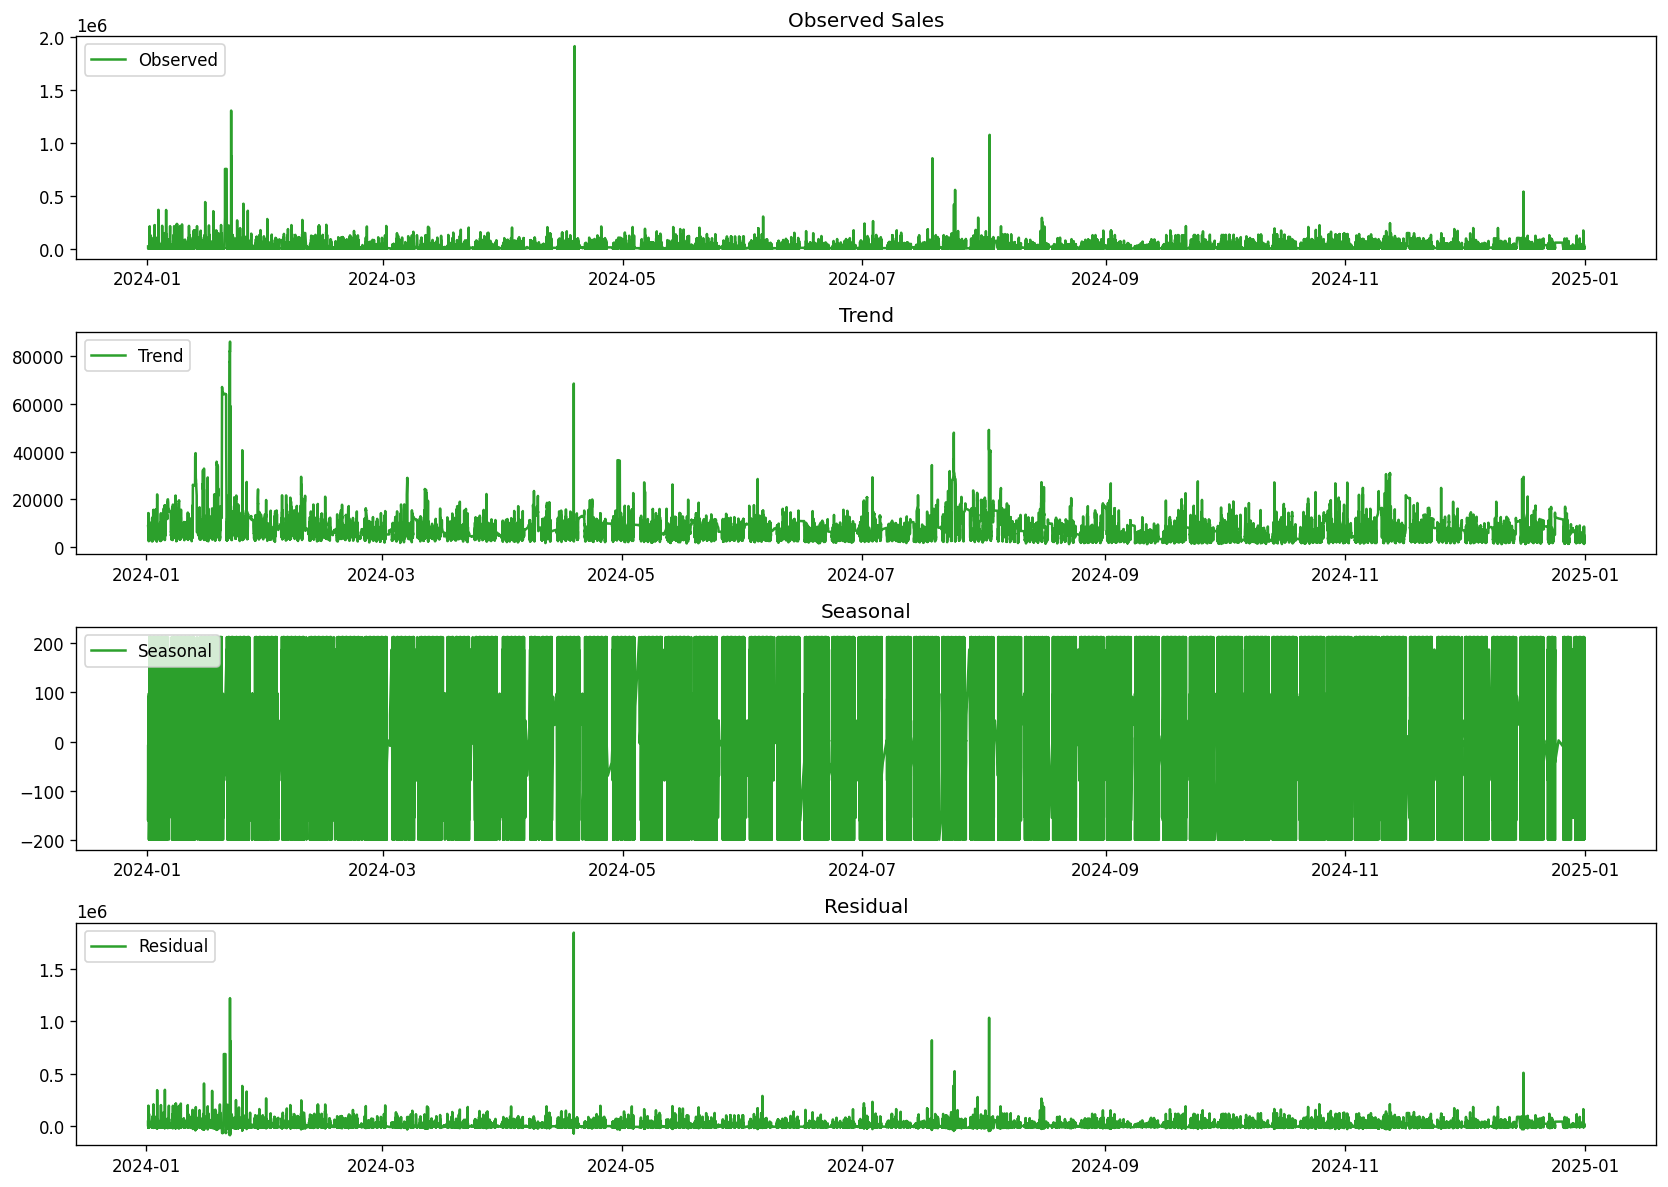

In [33]:
## Create a time series plot to show seasonal patterns or changes in sales performance.
# Decompose the time series data
decomposition = seasonal_decompose(new_data['sales'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed',color='tab:green')
plt.legend(loc='upper left')
plt.title('Observed Sales')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend',color='tab:green')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal',color='tab:green')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual',color='tab:green')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

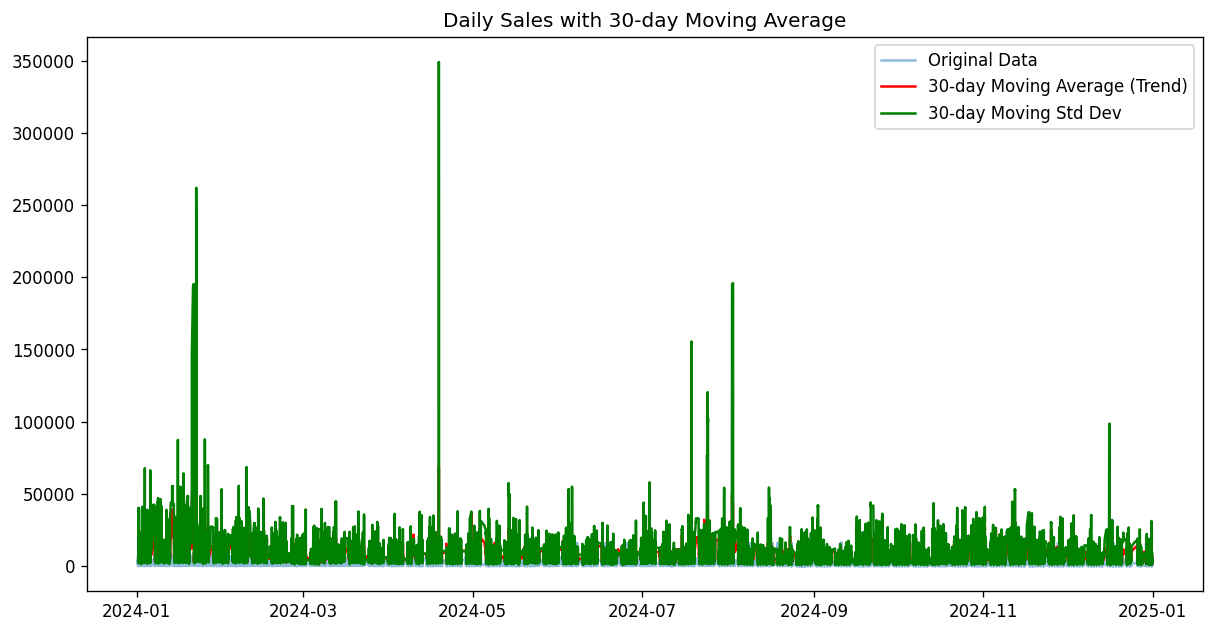

In [34]:
# Step 2: 30-day Moving Average to highlight the trend
sales_rolling = new_data["sales"].rolling(window=30).mean()
sales_rolling_std = new_data["sales"].rolling(window=30).std()
# Plot the original data and the 30-day moving average
plt.figure(figsize=(12, 6))
plt.plot(new_data["unit_price"], label="Original Data", alpha=0.5)
plt.plot(sales_rolling, label="30-day Moving Average (Trend)", color='red')
plt.plot(sales_rolling_std, label="30-day Moving Std Dev", color='green')
plt.title("Daily Sales with 30-day Moving Average")
plt.legend()
plt.show()

**PARAMETRIC TESTS**

In [35]:
## Downsample the data to weekly averages
weekly_sales = new_data['sales'].resample('W').mean() # resample weekly and calculate mean
print(weekly_sales.head())

## test for unit root mean
t_stat, p_value, _, _, critical_values, _  = adfuller(weekly_sales.values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
     
print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

date
2024-01-07    6601.069716
2024-01-14    7111.497727
2024-01-21    7919.712811
2024-01-28    8471.924172
2024-02-04    7443.617950
Freq: W-SUN, Name: sales, dtype: float64
ADF Statistic: -1.09
Critial Values:
   1%, -3.57
Critial Values:
   5%, -2.92
Critial Values:
   10%, -2.60

p-value: 0.72
Non-Stationary


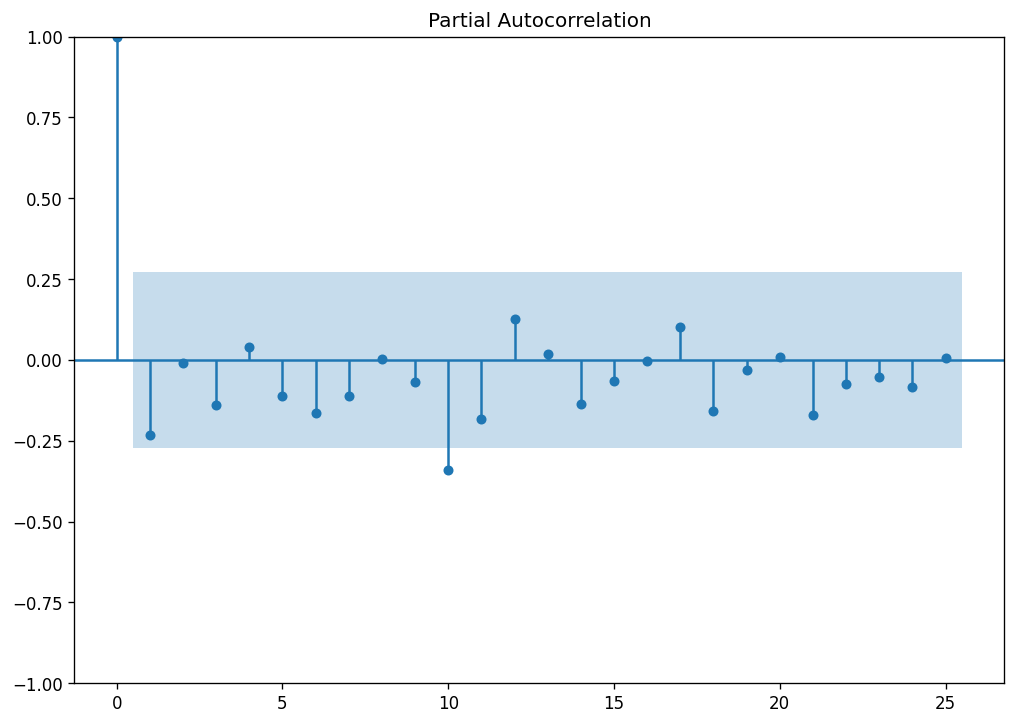

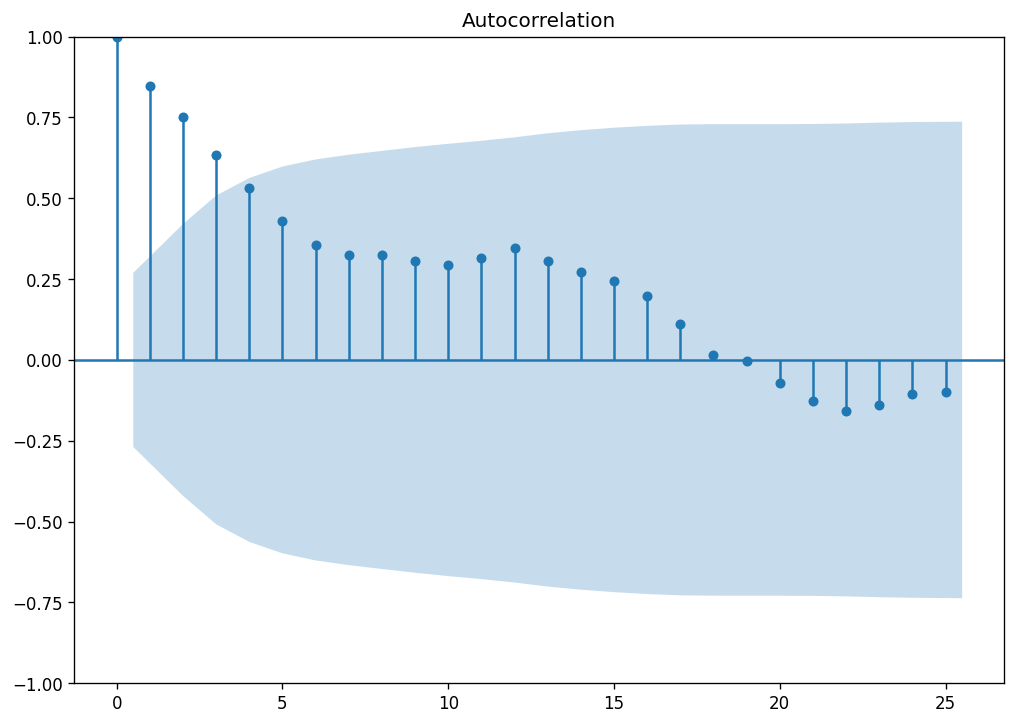

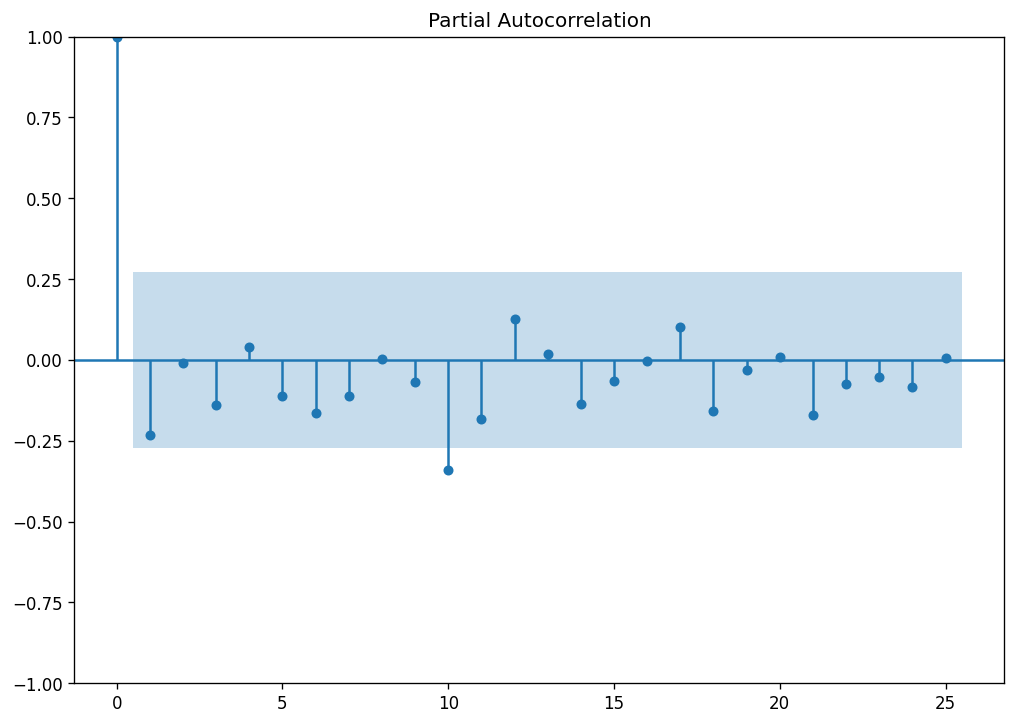

In [36]:
#Check for autocorrelation and partial correlation
plot_acf(weekly_sales, lags=25, alpha=0.05)
plot_pacf(weekly_sales.diff().dropna(), lags=25, alpha=0.05)

**REVIEW**

- The trend of sales over time by sales summation shows that  January and October are the most significant months by sales summation. 

- In total quantity of sales over time by sales shows that October, July and August are the most significant months where demand for products are higher than all the previous months.
In contrast to the trend of sales over time by sales summation, January is fairly on demand by quantity. 

- The 30-day moving average of sales shows a clear trend that shows an increasing trend over time. 

- The ADF test confirms that the sales data is not stationary. Therefore, there is a need to make sure that the sales data is stationary for the purposes of modelling.

- The autocorrelation plot shows that there is a high positive autocorrelation at lags 1, suggesting that there is both trend and seasonal pattern in the sales data. However, there is a gradual decline in the autocorrelation showing that it weakens over time as lag increases.

- The partial autocorrelation plot shows that there is a high positive partial autocorrelation at lag 1, suggesting that there might be a trend pattern in the sales data. The other lags have very low partial autocorrelation values.

3. PERFORMANCE ANALYSIS

    anonymized_product  quantity
339       Product-66e0   46960.0
753       Product-e805   42683.0
477       Product-8f75   37596.0
128       Product-29ee   35974.0
214       Product-4156   28496.0


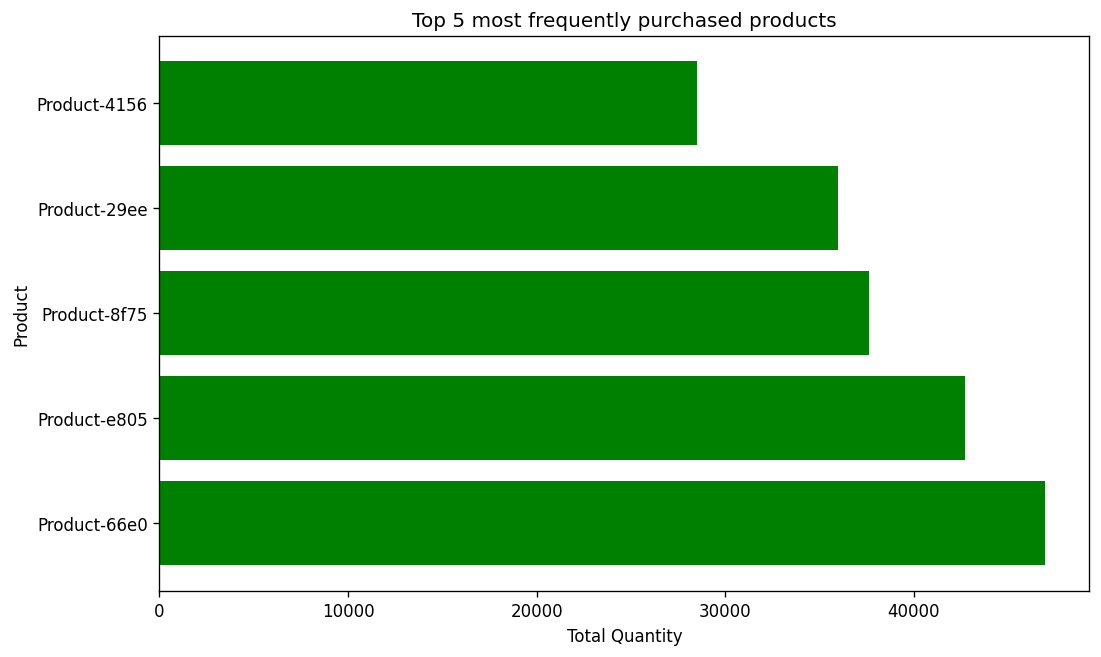

In [37]:
## Identify the top 5 most frequently purchased product based on the quantity
# Group by product and sum the quantities
top_products = new_data.groupby('anonymized_product')['quantity'].sum().reset_index()

# Sort the products by quantity in descending order
top_products = top_products.sort_values(by='quantity', ascending=False)

# Select the top 5 products
top_5_products = top_products.nlargest(5, 'quantity')

print(top_5_products)

## Visualize the top 5 products
plt.figure(figsize=(10, 6))
plt.barh(top_5_products['anonymized_product'], top_5_products['quantity'], color='green')
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Top 5 most frequently purchased products')
plt.show()

    anonymized_product        sales
753       Product-e805  263298831.0
477       Product-8f75  158926320.0
339       Product-66e0   70708705.0
128       Product-29ee   68309614.0
214       Product-4156   56974218.0


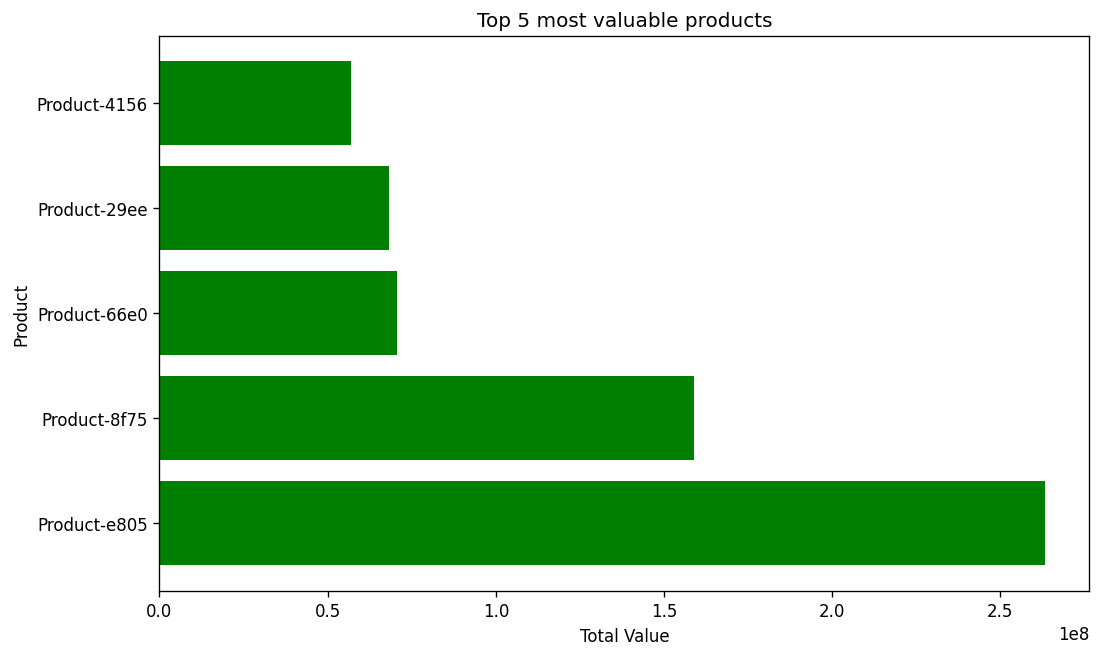

In [38]:
## Idnetify the top 5 most valuable products based on value 
# Group by product and sum the sales
top_products_value = new_data.groupby('anonymized_product')['sales'].sum().reset_index()

top_products_value = top_products_value.sort_values(by='sales', ascending=False)

top_5_products_value = top_products_value.nlargest(5, 'sales')

print(top_5_products_value)

## Visualize the top 5 products based on value
plt.figure(figsize=(10, 6))
plt.barh(top_5_products_value['anonymized_product'], top_5_products_value['sales'], color='green')
plt.xlabel('Total Value')
plt.ylabel('Product')
plt.title('Top 5 most valuable products')
plt.show()

**REVIEW**

- The most demanded products are product-66e0 with 46k in total quantity. The same product is also ranked in the 3 position in the top 5 products list by value at 70m. 
- The most valuable products are product is product-e805 with 263m in total sales and ranked second in the top 5 products list by quantity at 42k.

### **MODELLING**

***Customer segmentation***

1. Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior: Total Quantity purchased

In [39]:
# Extract the relevant data for clustering
clustering_data = pivot_table[['Total_quantity']]

# Display the first few rows of the clustering data
clustering_data.head()

,Total_quantity
2906,14427.0
4781,6758.0
1873,8214.0
144,6065.0
2353,6318.0


In [40]:
## Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

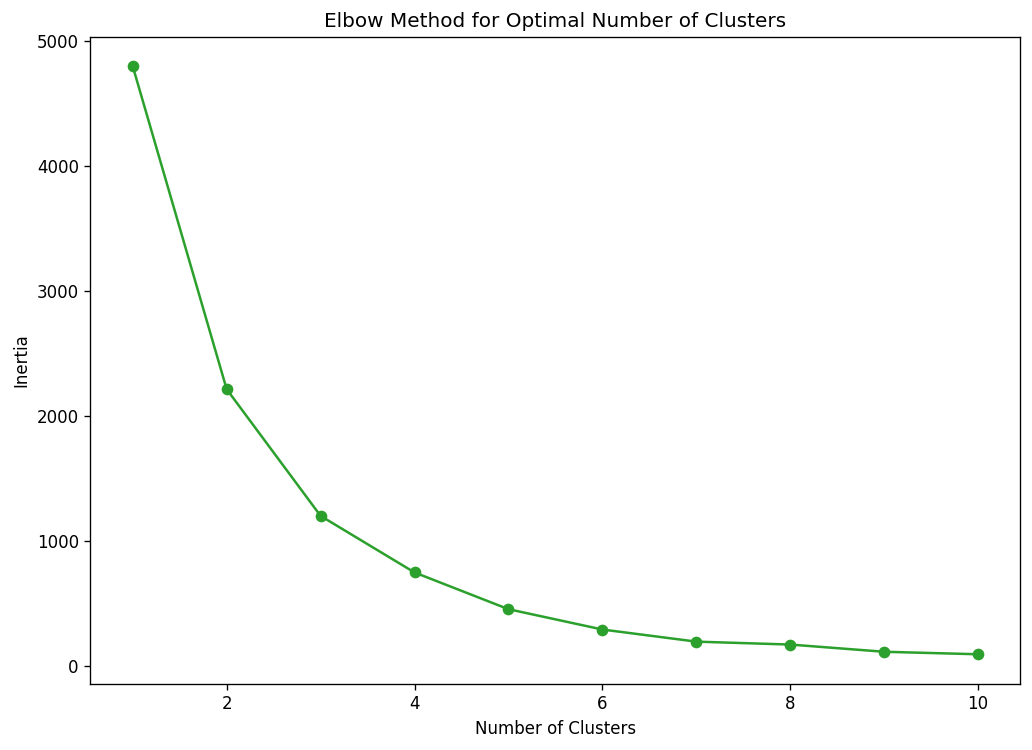

In [41]:
# Elbow Method to find optimal clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), inertia, marker='o',color='tab:green')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [89]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_data)

# Display the resulting dataframe with clusters
clustering_data.head()

,Total_quantity,Cluster
2906,14427.0,2
4781,6758.0,2
1873,8214.0,2
144,6065.0,2
2353,6318.0,2


In [43]:
# Add the cluster labels to the original pivot table
pivot_table['Cluster'] = clustering_data['Cluster']

## Display the resulting dataframe
pivot_table.head()

,anonymized_business,Total_quantity,Total_sales,Cluster
2906,Business-978e,14427.0,28934628.0,2
4781,Business-fe7d,6758.0,27024496.0,2
1873,Business-6068,8214.0,16464195.0,2
144,Business-07de,6065.0,16258068.0,2
2353,Business-7a03,6318.0,13968451.0,2


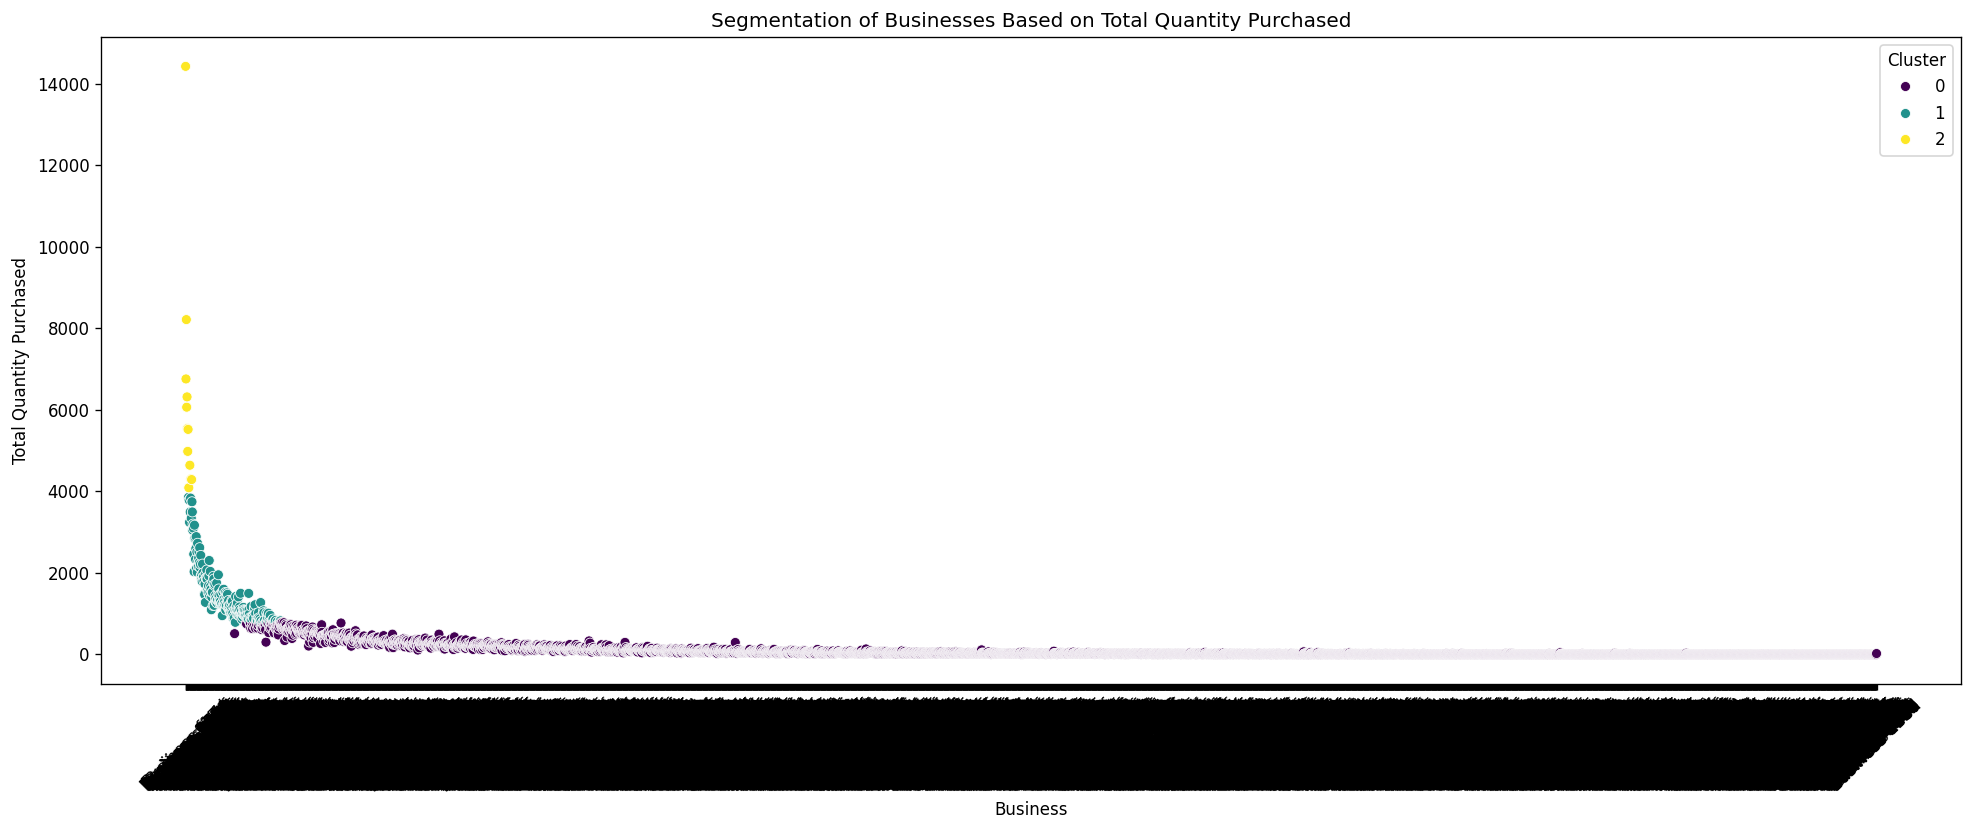

In [44]:
# Visualize the clusters
plt.figure(figsize=(20, 7))
sns.scatterplot(data=pivot_table, x='anonymized_business', y='Total_quantity', hue='Cluster', palette='viridis')
plt.title('Segmentation of Businesses Based on Total Quantity Purchased')
plt.xlabel('Business')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.show()

2. Perform a segmentation analysis of business based on their purchasing behaviour: total value contributed

In [45]:
# Extract the relevant data for clustering
business_data_value = pivot_table[['Total_sales']]

## view the data 
business_data_value.head(2)

,Total_sales
2906,28934628.0
4781,27024496.0


In [46]:
# Standardize the data
scaler = StandardScaler()
business_data_value_scaled = scaler.fit_transform(business_data_value)

In [90]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)

business_data_value.loc[:,'Cluster'] = kmeans.fit_predict(business_data_value_scaled)

## Display results

business_data_value.head()

,Total_sales,Cluster
2906,28934628.0,2
4781,27024496.0,2
1873,16464195.0,2
144,16258068.0,2
2353,13968451.0,2


In [48]:
# Add the cluster labels to the original pivot table
pivot_table['Cluster_value'] = business_data_value['Cluster']

# Display the first few rows of the pivot table with cluster labels
pivot_table.head()

,anonymized_business,Total_quantity,Total_sales,Cluster,Cluster_value
2906,Business-978e,14427.0,28934628.0,2,2
4781,Business-fe7d,6758.0,27024496.0,2,2
1873,Business-6068,8214.0,16464195.0,2,2
144,Business-07de,6065.0,16258068.0,2,2
2353,Business-7a03,6318.0,13968451.0,2,2


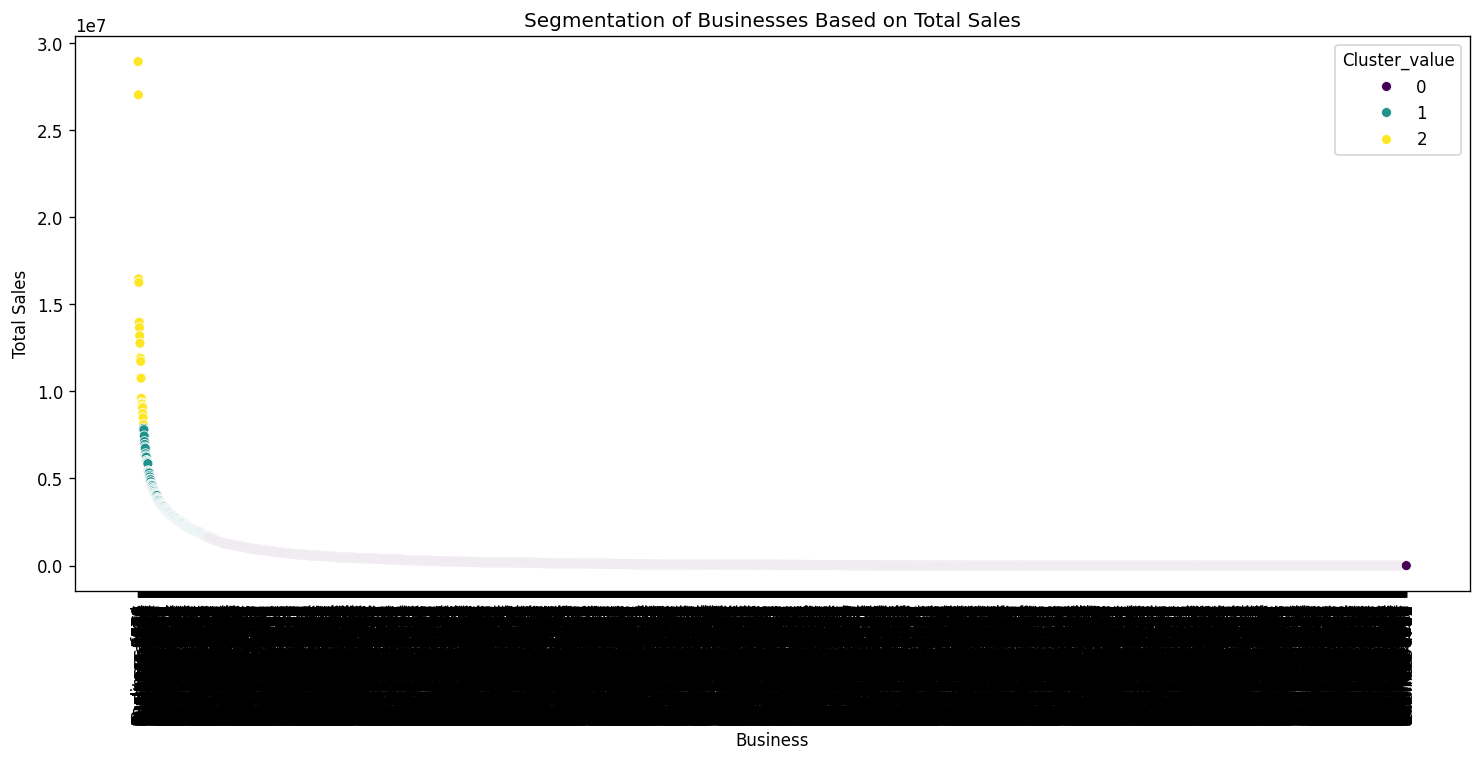

In [49]:
# Visualize the clusters
plt.figure(figsize=(15, 6))
sns.scatterplot(data=pivot_table, x='anonymized_business', y='Total_sales', hue='Cluster_value', palette='viridis')
plt.title('Segmentation of Businesses Based on Total Sales')
plt.xlabel('Business')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

3. Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior: Frequency of transactions.

In [50]:
# Calculate the number of transactions for each business
transaction_frequency = new_data.groupby('anonymized_business').size().reset_index(name='transaction_count')

## View the transaction data
transaction_frequency.head(2)

,anonymized_business,transaction_count
0,Business-0000,8
1,Business-0005,1


In [51]:
# Standardize the data
scaler = StandardScaler()
transaction_frequency_scaled = scaler.fit_transform(transaction_frequency[['transaction_count']])

In [52]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
transaction_frequency['Cluster_T'] = kmeans.fit_predict(transaction_frequency_scaled)

## Display the results

transaction_frequency.head()

,anonymized_business,transaction_count,Cluster_T
0,Business-0000,8,0
1,Business-0005,1,0
2,Business-0029,6,0
3,Business-003d,31,0
4,Business-0072,101,0


In [53]:
# Add the cluster labels to the original pivot table
pivot_table = pivot_table.merge(transaction_frequency[['anonymized_business', 'Cluster_T']], on='anonymized_business', how='left')

# Display the first few rows of the pivot table with cluster labels
pivot_table.head()

,anonymized_business,Total_quantity,Total_sales,Cluster,Cluster_value,Cluster_T
0,Business-978e,14427.0,28934628.0,2,2,1
1,Business-fe7d,6758.0,27024496.0,2,2,1
2,Business-6068,8214.0,16464195.0,2,2,1
3,Business-07de,6065.0,16258068.0,2,2,1
4,Business-7a03,6318.0,13968451.0,2,2,1


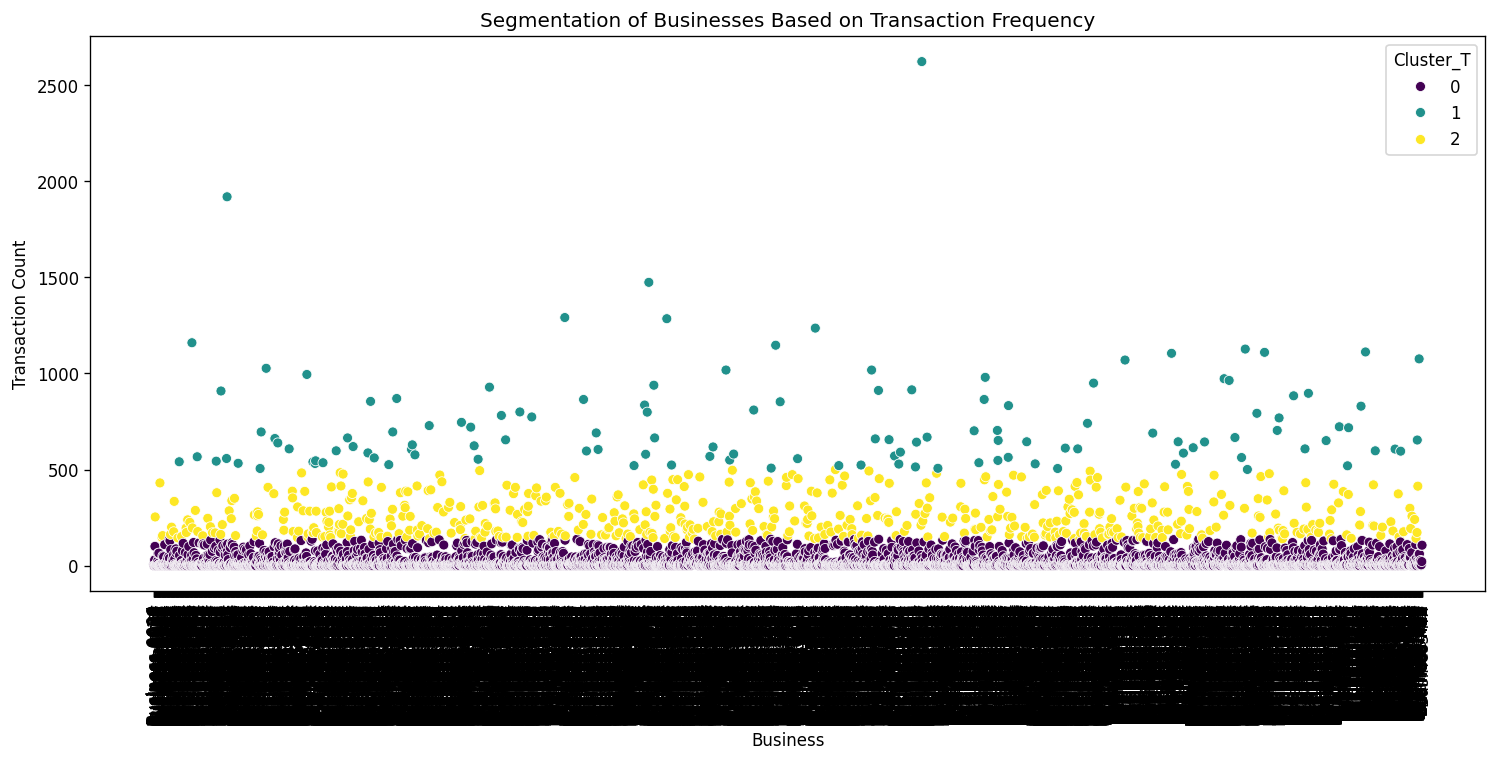

In [54]:
# Visualize the clusters
plt.figure(figsize=(15, 6))
sns.scatterplot(data=transaction_frequency, x='anonymized_business', y='transaction_count', hue='Cluster_T', palette='viridis')
plt.title('Segmentation of Businesses Based on Transaction Frequency')
plt.xlabel('Business')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()

4. Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.

In [55]:
# Map clusters to groups (High, Medium, Low Value) based on total quantity
pivot_table['Group'] = pivot_table['Cluster'].map({
    0: 'Medium Value',
    1: 'Low Value',
    2: 'High Value'
})

## sort clusters

pivot_table = pivot_table.sort_values(by='Cluster', ascending=False)

# Display the first few rows of the pivot table with group labels

pivot_table.head()

,anonymized_business,Total_quantity,Total_sales,Cluster,Cluster_value,Cluster_T,Group
0,Business-978e,14427.0,28934628.0,2,2,1,High Value
7,Business-468e,5520.0,12766187.0,2,2,1,High Value
17,Business-0e5b,4289.0,9062164.0,2,2,1,High Value
15,Business-80b3,4303.0,9275497.0,2,2,1,High Value
9,Business-5613,4089.0,11895552.0,2,2,1,High Value


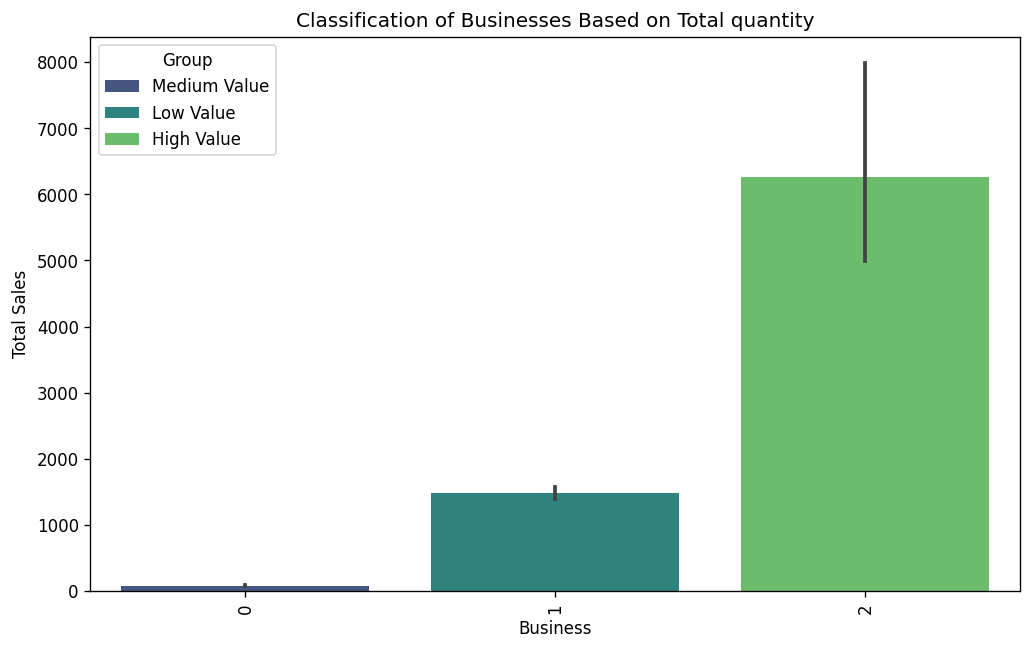

In [56]:
# Visualize the classification
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x='Cluster', y='Total_quantity', hue='Group', palette='viridis')
plt.title('Classification of Businesses Based on Total quantity')
plt.xlabel('Business')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [81]:
### Customer retention
# Count transactions per customer per month
purchase_trends = new_data.groupby(['anonymized_business', 'month_year']).size().reset_index(name='Purchase_Count')

# Identify customers with declining purchase frequency
def identify_churned_customers(df):
    decline_customers = []
    for customer, group in df.groupby('anonymized_business'):
        group = group.sort_values('month_year')
        if len(group) > 1 and group['Purchase_Count'].iloc[-1] < group['Purchase_Count'].iloc[0]:
            decline_customers.append(customer)
    return decline_customers

churned_customers = identify_churned_customers(purchase_trends)

# Output list of businesses with declining purchase frequency
print("Customers with reduced purchase frequency:", churned_customers)
churned_customers

Customers with reduced purchase frequency: ['Business-0072', 'Business-0105', 'Business-010c', 'Business-013f', 'Business-01a0', 'Business-01de', 'Business-01e4', 'Business-0204', 'Business-0215', 'Business-0240', 'Business-0264', 'Business-0287', 'Business-0305', 'Business-0335', 'Business-0354', 'Business-0357', 'Business-0384', 'Business-03a3', 'Business-03e1', 'Business-040a', 'Business-0437', 'Business-044c', 'Business-0463', 'Business-046d', 'Business-04f3', 'Business-04fc', 'Business-0523', 'Business-0569', 'Business-0570', 'Business-05a3', 'Business-05d3', 'Business-05dc', 'Business-05ff', 'Business-0610', 'Business-067e', 'Business-069c', 'Business-06ba', 'Business-06fe', 'Business-0766', 'Business-077d', 'Business-079e', 'Business-07ef', 'Business-07fe', 'Business-0825', 'Business-083e', 'Business-0849', 'Business-0855', 'Business-0860', 'Business-08e0', 'Business-08e8', 'Business-096c', 'Business-0994', 'Business-09c8', 'Business-09dd', 'Business-09e4', 'Business-0a00', 'Bus

['Business-0072',
 'Business-0105',
 'Business-010c',
 'Business-013f',
 'Business-01a0',
 'Business-01de',
 'Business-01e4',
 'Business-0204',
 'Business-0215',
 'Business-0240',
 'Business-0264',
 'Business-0287',
 'Business-0305',
 'Business-0335',
 'Business-0354',
 'Business-0357',
 'Business-0384',
 'Business-03a3',
 'Business-03e1',
 'Business-040a',
 'Business-0437',
 'Business-044c',
 'Business-0463',
 'Business-046d',
 'Business-04f3',
 'Business-04fc',
 'Business-0523',
 'Business-0569',
 'Business-0570',
 'Business-05a3',
 'Business-05d3',
 'Business-05dc',
 'Business-05ff',
 'Business-0610',
 'Business-067e',
 'Business-069c',
 'Business-06ba',
 'Business-06fe',
 'Business-0766',
 'Business-077d',
 'Business-079e',
 'Business-07ef',
 'Business-07fe',
 'Business-0825',
 'Business-083e',
 'Business-0849',
 'Business-0855',
 'Business-0860',
 'Business-08e0',
 'Business-08e8',
 'Business-096c',
 'Business-0994',
 'Business-09c8',
 'Business-09dd',
 'Business-09e4',
 'Business

**RECOMMENDATIONS**

***HIGH VALUE BUSINESSES*** 
- Businesses under this classification purchase large quantities and are the most profitable customers. With such portfolio purchase these businesses could be offered:
    - Personalized account management and services both in and after sales services.
    - Personalized marketing campaigns to target high-value customers like having exclusive offers tailored to them.
    - Offer pre-launch access to early products before they launch in the market.

***MEDIUM VALUE BUSINESSES***
- These businesses purchase moderate quantities and are profitable that could be pushed to high value customers. With such portfolio purchase these businesses could be offered:
    - Upsell opportunities offering upgrade services and complementary products.
    - Offer targeted promotions and discounts tailored to their purchasing power.
    - Periodic check Ins. 

***LOW VALUE BUSINESSES***
- These businesses purchase low quantities and are not profitable. With such portfolio purchase these businesses could be offered:
    - Offer personalized service and support to help them overcome challenges.
    - Offer discounts for higher purchase quantities and encourage them to upscale their portfolios for more offers.
    - Collect feedback from the customers about services offered and product reviews.
    - Engage the customers through email automation and newsletters that touch on their purchase products. 

**FORECAST**

Forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

In [57]:
## Aggregate data to capture daily sales 

daily_sales = new_data.groupby(new_data.index)["sales"].sum().reset_index()

## Sort daily sales

daily_sales = daily_sales.sort_values(by='date', ascending=True)

# Display the daily sales data

daily_sales.head(3)

,date,sales
0,2024-01-01 05:54:00,23040.0
1,2024-01-01 07:18:00,8725.0
2,2024-01-01 10:45:00,12590.0


In [58]:
## Resample the daily sales data

daily_sales_agg = daily_sales.resample("D", on="date").sum().reset_index()

# Display the resampled daily sales data
daily_sales_agg.head(3), daily_sales_agg.tail(3)

(        date      sales
 0 2024-01-01  7201819.0
 1 2024-01-02  8515235.0
 2 2024-01-03  7348868.0,
           date      sales
 363 2024-12-29  3955897.0
 364 2024-12-30  3409782.0
 365 2024-12-31  2205540.0)

In [59]:
## Prepare the time series data

sales_data = daily_sales_agg.set_index('date')

# Display the time series data

sales_data.head(3)

,sales
date,
2024-01-01,7201819.0
2024-01-02,8515235.0
2024-01-03,7348868.0


In [60]:
## Make the series stationary
def make_stationary(data):
    return data.diff().dropna()

# Making the time series stationary
sales_data["sale_diff"] = make_stationary(sales_data["sales"])

In [61]:
# train_data= train_data.set_index("date")
## Downsample the data to weekly averages
wkly_sales = sales_data["sale_diff"].resample('W').mean() # resample weekly and calculate mean
print(wkly_sales.head())

## Check if the data is stationary
t_stat, p_value, critical_values, _, _ = zivot_andrews(wkly_sales.values)
print(f'Zivot-Andrews Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

date
2024-01-07    332351.166667
2024-01-14   -369529.285714
2024-01-21     -6701.857143
2024-01-28   -100701.857143
2024-02-04     86470.285714
Freq: W-SUN, Name: sale_diff, dtype: float64
Zivot-Andrews Statistic: -8.14
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary


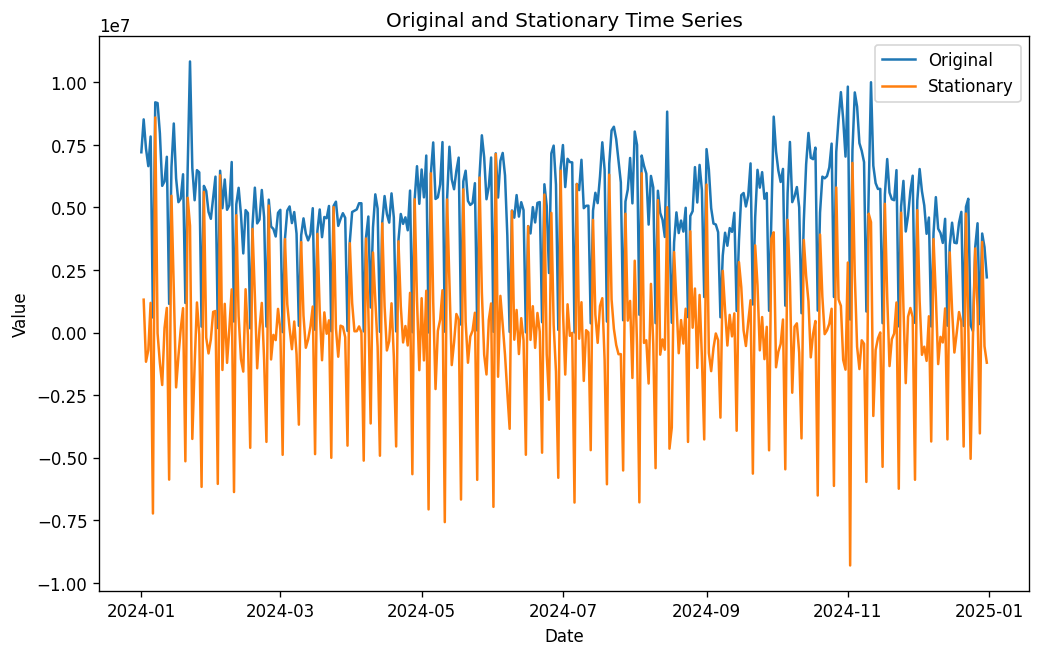

In [62]:
## Visualize to see if the data is stationary
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Original')
plt.plot(sales_data.index, sales_data["sale_diff"], label='Stationary')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Stationary Time Series')
plt.legend()
plt.show()

Dataset splitting

In [63]:
sales_data= sales_data.dropna()

In [64]:
# Train-Test Split (80-20)
train_size = int(len(sales_data) * 0.8)
train = sales_data[:train_size]
test = sales_data[train_size:]
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)


Training set shape: (292, 2)
Testing set shape: (73, 2)


**AUTOREG**

In [65]:
auto_model = AutoReg(train['sale_diff'], lags=7)
model_fit = auto_model.fit()
model= model_fit.summary()
model

c:\Users\ADMIN\Desktop\creative_parasite projects\KT-sales-data\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              sale_diff   No. Observations:                  292
Model:                     AutoReg(7)   Log Likelihood               -4392.284
Method:               Conditional MLE   S.D. of innovations        1193718.868
Date:                Fri, 31 Jan 2025   AIC                           8802.568
Time:                        08:00:03   BIC                           8835.440
Sample:                    01-09-2024   HQIC                          8815.746
                         - 10-19-2024                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.171e+04   7.07e+04     -0.307      0.759    -1.6e+05    1.17e+05
sale_diff.L1    -0.6771      0.057    -11.948      0.000      -0.788      -0.566
sale_diff.L2    -0.6380      0.060    -10.662      0.000      -0.755      -0.521
sale_diff.L3    -0.5999      0.062     -9.623      0.000      -0.722      -0.478
sale_diff.L4    -0.5576      0.064     -8.751      0.000      -0.682      -0.433
sale_diff.L5    -0.5822      0.062     -9.324      0.000      -0.705      -0.460
sale_diff.L6    -0.5792      0.061     -9.571      0.000      -0.698      -0.461
sale_diff.L7     0.2759      0.056      4.901      0.000       0.166       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9251           -0.4378j            1.0235           -0.4297
AR.2           -0.9251           +0.4378j            1.0235            0.4297
AR.3           -0.2282           -0.9906j            1.0165           -0.2860
AR.4           -0.2282           +0.9906j            1.0165            0.2860
AR.5            0.6526           -0.8088j            1.0393           -0.1420
AR.6            0.6526           +0.8088j            1.0393            0.1420
AR.7            3.1010           -0.0000j            3.1010           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
## Predict the outcome
forecast_steps = 90
Forecast = model_fit.predict(start=len(train["sale_diff"]), 
                             end=len(train["sale_diff"])+len(test["sale_diff"]) + forecast_steps -1, 
                             dynamic=False)

# Convert forecast to a pandas series

forecast_series = pd.Series(Forecast, index=test.index)
forecast_series

c:\Users\ADMIN\Desktop\creative_parasite projects\KT-sales-data\myenv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


date
2024-10-20    3.664792e+06
2024-10-21    1.879094e+06
2024-10-22    9.670555e+05
2024-10-23   -9.543218e+05
2024-10-24    3.446476e+05
                  ...     
2024-12-27    1.020819e+05
2024-12-28   -1.351409e+06
2024-12-29    8.209280e+05
2024-12-30    2.262914e+05
2024-12-31   -1.249762e+05
Length: 73, dtype: float64

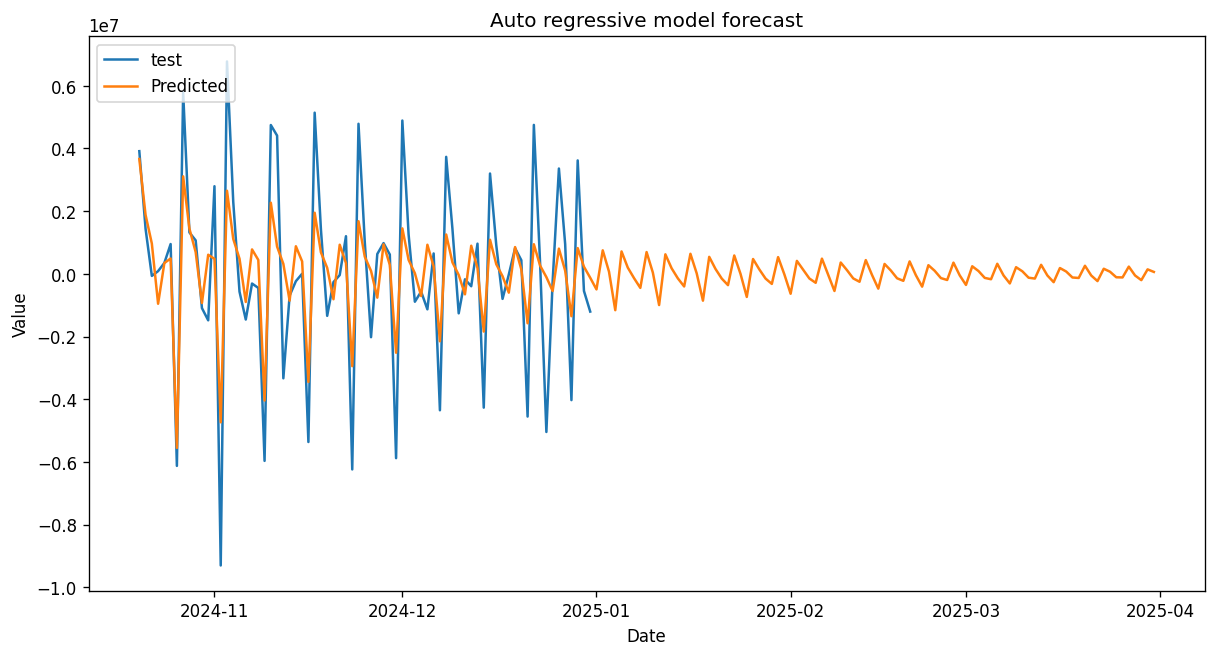

In [67]:
## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["sale_diff"], label='test')
plt.plot(Forecast, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("Auto regressive model forecast")
plt.show()

**ARIMA MODEL**

In [70]:
## Check for the best parameters
step_wise_fit= auto_arima(train["sale_diff"],
                          trace=True,
                          seasonal=True,
                          m=7,
                          stepwise=True,
                          suppress_warnings=True)

step_wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=9174.715, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=9546.529, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=9279.702, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=9279.475, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=9544.544, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=9260.997, Time=0.55 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=9191.749, Time=0.19 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=9176.597, Time=0.91 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=9176.682, Time=0.84 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=9341.563, Time=0.34 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=9229.054, Time=0.73 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=9182.306, Time=0.71 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=9173.539, Time=0.42 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  292
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -4579.770
Date:                             Fri, 31 Jan 2025   AIC                           9173.539
Time:                                     08:00:17   BIC                           9199.277
Sample:                                 01-02-2024   HQIC                          9183.849
                                      - 10-19-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.401e+04   3.15e+04     -0.444      0.657   -7.58e+04    4.78e+04
ar.L1         -0.9467      0.447     -2.116      0.034      -1.823      -0.070
ma.L1          0.2557      0.449      0.570      0.569      -0.624       1.135
ma.L2         -0.6872      0.300     -2.293      0.022      -1.274      -0.100
ar.S.L7        0.9715      0.052     18.556      0.000       0.869       1.074
ma.S.L7       -0.7001      0.288     -2.430      0.015      -1.265      -0.135
sigma2      5.158e+12    5.5e-05   9.39e+16      0.000    5.16e+12    5.16e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                29.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.03
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.6e+36. Standard errors may be unstable.
"""

In [71]:
# Fit the ARIMA model
model = ARIMA(train['sale_diff'], order=(1, 0, 2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              sale_diff   No. Observations:                  292
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4669.412
Date:                Fri, 31 Jan 2025   AIC                           9348.824
Time:                        08:00:17   BIC                           9367.208
Sample:                    01-02-2024   HQIC                          9356.188
                         - 10-19-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.166e+04   1.71e+04     -1.267      0.205   -5.52e+04    1.18e+04
ar.L1         -0.7947      0.068    -11.612      0.000      -0.929      -0.661
ma.L1          0.0331      0.047      0.708      0.479      -0.059       0.125
ma.L2         -0.8848      0.042    -20.897      0.000      -0.968      -0.802
sigma2      5.165e+12      0.000   2.89e+16      0.000    5.16e+12    5.16e+12
===================================================================================
Ljung-Box (L1) (Q):                   4.74   Jarque-Bera (JB):                52.28
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -1.01
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.41e+31. Standard errors may be unstable.
"""

date
2024-10-20    3.365296e+06
2024-10-21    1.270852e+06
2024-10-22   -1.048809e+06
2024-10-23    7.946057e+05
2024-10-24   -6.703399e+05
                  ...     
2024-12-27   -2.166062e+04
2024-12-28   -2.166014e+04
2024-12-29   -2.166052e+04
2024-12-30   -2.166022e+04
2024-12-31   -2.166046e+04
Name: predicted_mean, Length: 73, dtype: float64


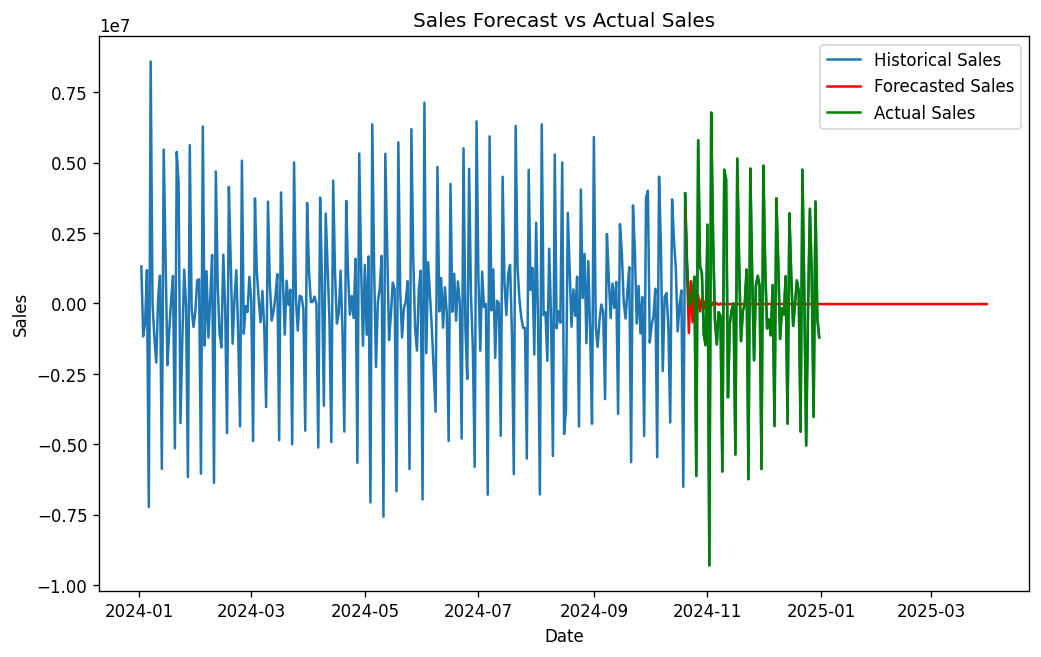

In [78]:
# Forecast the next 3 months (approximately 90 days)
forecast = model_fit.predict(start=len(train["sale_diff"]), 
                             end=len(train["sale_diff"])+len(test["sale_diff"]) + forecast_steps -1, 
                             dynamic=False)

# Convert the forecast to a pandas series
fc_series= pd.Series(forecast, index=test.index)
print(fc_series)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['sale_diff'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.plot(test.index, test['sale_diff'], label='Actual Sales', color='green')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**SARIMA MODEL**

In [79]:
# Fit an SARIMA model with no differencing 
model = SARIMAX(train['sale_diff'], order=(1, 0, 2),seasonal_order=(1,0,1,7))
model_SARIMA = model.fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           sale_diff   No. Observations:                  292
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -4577.608
Date:                             Fri, 31 Jan 2025   AIC                           9167.217
Time:                                     08:06:34   BIC                           9189.277
Sample:                                 01-02-2024   HQIC                          9176.053
                                      - 10-19-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8884      0.269      3.303      0.001       0.361       1.416
ma.L1         -1.6096      0.407     -3.950      0.000      -2.408      -0.811
ma.L2          0.6107      0.402      1.518      0.129      -0.178       1.399
ar.S.L7        0.9774      0.045     21.635      0.000       0.889       1.066
ma.S.L7       -0.7119      0.275     -2.586      0.010      -1.252      -0.172
sigma2      5.159e+12   3.92e-14   1.31e+26      0.000    5.16e+12    5.16e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                31.86
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.08
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.13e+42. Standard errors may be unstable.
"""

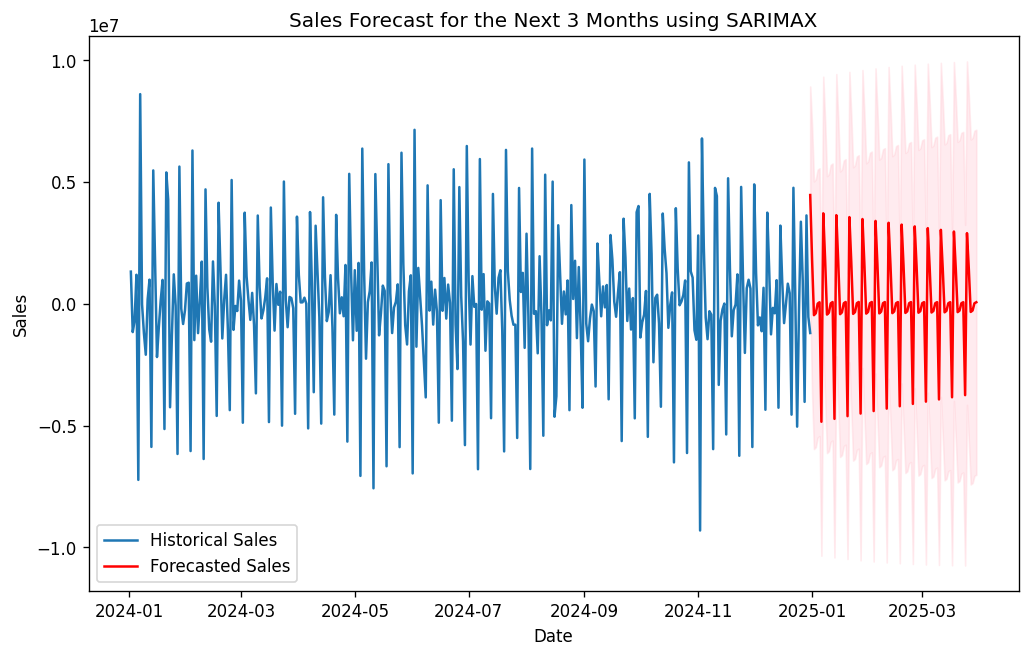

In [80]:
# Forecast the next 3 months (approximately 90 days) using the SARIMAX model
forecast_sarimax = model_SARIMA.get_forecast(steps=90)
forecast_sarimax_mean = forecast_sarimax.predicted_mean
forecast_sarimax_conf_int = forecast_sarimax.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['sale_diff'], label='Historical Sales')
plt.plot(pd.date_range(start=sales_data.index[-1], periods=90, freq='D'), forecast_sarimax_mean, label='Forecasted Sales', color='red')
plt.fill_between(pd.date_range(start=sales_data.index[-1], periods=90, freq='D'), 
                 forecast_sarimax_conf_int.iloc[:, 0], 
                 forecast_sarimax_conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast for the Next 3 Months using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**REVIEWS**

- The sales data analysis has been performed using various time series analysis techniques such as ARIMA, SARIMA, and auto-regressive model (AR). The results show that the sales data follows a non-stationary series and has been sorted by differencing. 
- In the models SARIMA provides the best forecasted data for the next 3 months clearly showing a good prediction of a trend series in those 3 months. 
- AR model performed well in forecasting the next 3 months. However, it was not a full trending line but it was able to depict sales for the next 3 months. 
- ARIMA model performed poorly in forecasting the next 3 months.

- To improve the forecasting model, more data and features (like promotions, seasonality, customer demographics, etc.) could be considered. Also, additional techniques like machine learning algorithms like LSTM (Long Short-Term Memory) or Prophet could be used to forecast future sales. However, these techniques require more computational resources and time to implement.

3. Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data.

In [84]:
# Prepare the data for anomaly detection
sale_data = new_data[['sales']].copy()

In [85]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
model.fit(sale_data)

IsolationForest(contamination=0.01, random_state=42)

In [86]:
# Predict anomalies
sale_data['anomaly'] = model.predict(sale_data)

# Extract the anomalies
anomalies = sale_data[sale_data['anomaly'] == -1]

# Print the anomalies
print("Anomalies detected:")
print(anomalies)

Anomalies detected:
                        sales  anomaly
date                                  
2024-01-01 13:40:00   64800.0       -1
2024-01-01 15:30:00   84800.0       -1
2024-01-01 15:30:00  212000.0       -1
2024-01-01 16:32:00   53060.0       -1
2024-01-01 17:04:00   45480.0       -1
...                       ...      ...
2024-12-29 20:42:00  124000.0       -1
2024-12-30 15:14:00   97000.0       -1
2024-12-31 08:50:00   48500.0       -1
2024-12-31 09:19:00   43650.0       -1
2024-12-31 12:52:00  172500.0       -1

[3226 rows x 2 columns]


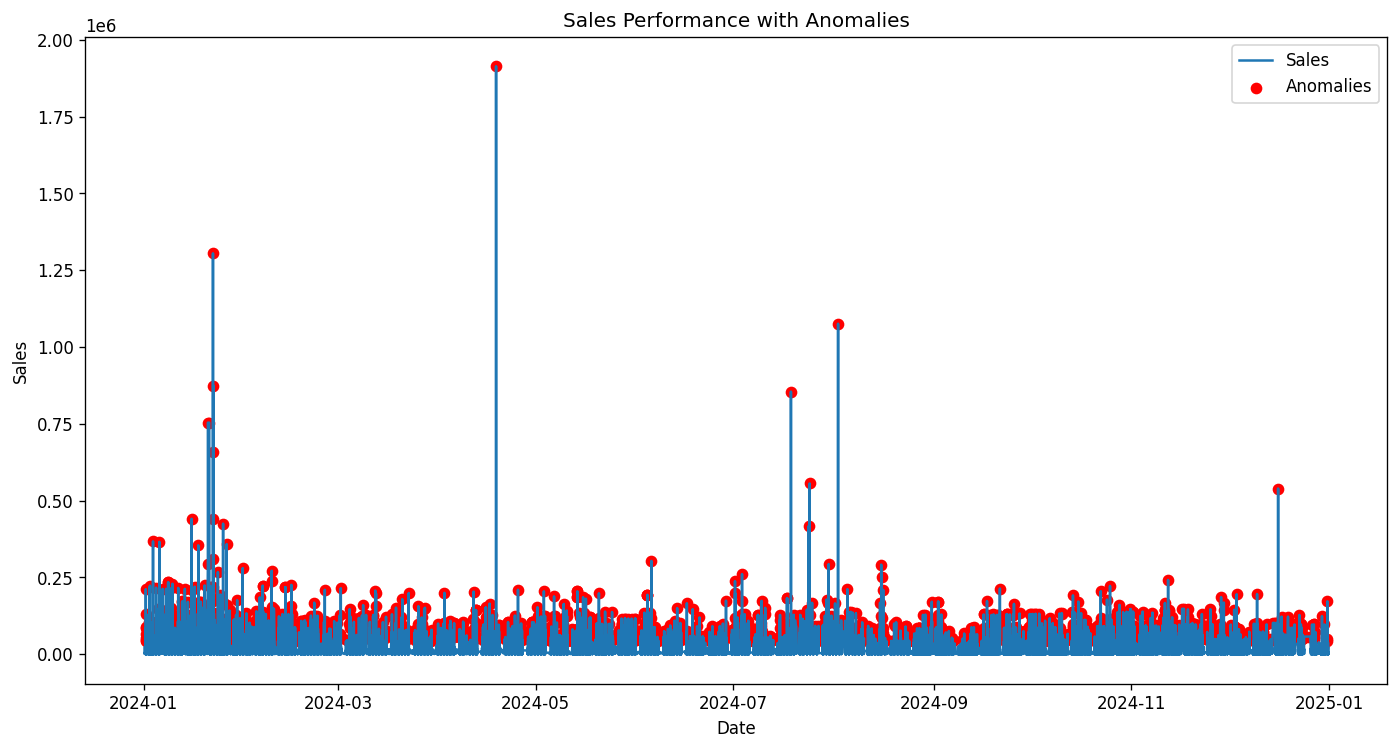

In [87]:
# Plot the sales data with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(new_data.index, new_data['sales'], label='Sales')
plt.scatter(anomalies.index, anomalies['sales'], color='red', label='Anomalies')
plt.title('Sales Performance with Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**REVIEW** 

- The data shows high levels of anomalities that has influence the sales performance indicated  by the red dots. This is because:
  - `MISSING DATES` : Unrecorded dates where sales and purchases have been made results to anomalities in the dataset.
  - `OUTLIERS` : Outliers in both quantity and unit price of the products has a significant influence on the sales performance hence anomalities in the sales performance.
  - `SEASONALITY` : Sales performance is determined by demand and also external factors such as holidays, weather, etc happening within certain seasons. Thus contributing to spiked performance and fluctuations.
  - `PROMOTIONAL ACTIVITIES` : Discounted offers and low sale prices attract and attribute to temporary spiked sales.
  - `INVENTORY ISSUES` : Where certain days or months there is stock shortages or overstock situations that lead to missed sales opportunities or excess stock that could result to dead stock.

4. Correlation Analysis: Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

Correlation coefficient between Quantity and Value: 0.8374833819478744


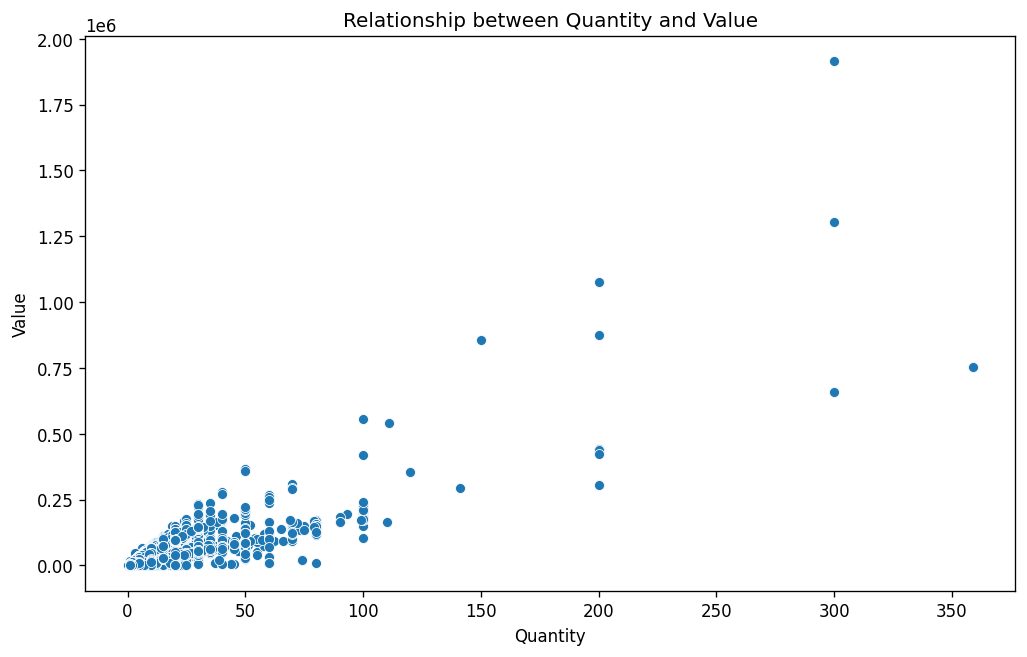

In [88]:
# Calculate the correlation coefficient between Quantity and Value
correlation = new_data['quantity'].corr(new_data['sales'])
print(f"Correlation coefficient between Quantity and Value: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='quantity', y='sales')
plt.title('Relationship between Quantity and Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

**REVIEW** 

- The correlation coefficient between Quantity and Value is approximately 0.83, which indicates a strong positive correlation. This suggests that as the quantity increases, the sales value also tend to increase. This indicates that sales performance is influenced by both the quantity of products sold and the price of each product. However, the key drivers of sales performance include:
  - `PRICING STRATEGY` : With discounts and promotional offers they boost the sales revenue by the quantity being sold.
  - `CUSTOMER DEMAND AND SEASONALITY` : Where there are holidays or certain events customers tend to purchase more than their usual purchase rate which in turn contributes to sales increase. 
  - `INVENTORY MANAGEMENT` : If there is no stock then sales depreciate, and overstock situation may results to holding costs.
  - `MARKETING AND ADVERTISEMENT` : Effective marketing strategies can drive sales by increasing the demand and boosting sales revenue.
  - `EXTERNAL FACTORS` : Like economical constraints, inflation of prices, natural disasters influence the purchasing behaviour of customers and sales revenue.

## **STRATEGY AND RECOMMENDATIONS**

Based on the analysis and insights provided, the company can implement the following strategies and recommendations:

1. **Product Strategy:**
   - Product 29ee has a profitability potential and could yield profit margins with an average unit price of 1898 per unit.This has been derived by dividing total value/total quantity. A key strategy that could be implemented on this product is expansion of reach through the help of digital marketing and partnerships with other relatable companies that complement the product. 
   - Since its a high value product, premium positioning by targeting our high valued customers in personalized offers could leverage its sales and quantity. 

2. **Customer Retention:**
   - Implement a loyalty program that rewards customers for regular purchases and promotions. This could be done through a tiered reward system, where customers earn points for every purchase and redeem them for discounts. Additionally, offering incentives for returning customers could boost sales.
   - Re-engage the customers with feedbacks and surveys. Seek their feedback points on improvements and provide updates on their point of view implementations. This makes them feel like they are part of the company. 
   - Host exclusive product launches and early access. This makes them feel valued by offering first point of contact before market access.

3. **Inventory Management:**
   - Implement a stock management system that tracks the inventory levels and alerts for stock shortages or overstock situations. This reduces the risk of stockouts and dead stock especially in months like January or october.
   - In seasons where months are affected by holidays like February, these are the months where stock levels should be optimally adjusted and promotional offers should be updated accordingly. 

4. **Pricing Strategy:**
   - Implement a dynamic pricing strategy that adjusts the price based on demand, seasonality, and other factors. This helps in maximizing sales while minimizing costs. One product that can be individually adjusted is product-66e0 simply because it has the highest total quantity however it ranks third on the total value of the product. 

In [77]:
# new_data.to_csv("dataset.csv")